In [1]:
from IPython.display import Image, display
from IPython.core.display import HTML

image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR7ltoZT1furs24vWMk_3cKdicA5rIXxpjo_A&usqp=CAU'
frame_width = 500
frame_height = 500
image_tag = f'<img src="{image_url}" style="width:{frame_width}px; height:{frame_height}px; display: block; margin: 0 auto;">'

display(HTML(image_tag))

# Introduction
> We are working with a dataset that contains information about Airbnb listings in the US. Our goal is to predict the price of a stay in these listings. The dataset consists of 74411 listings and 29 columns. One of the columns, log_price, is the target variable that we are trying to predict

<font color = 'yellow'>
Content: 

1. [Load and Check Data](#1)

1. [Variable Description](#2)
1. [Basic Data Analysis](#3)
1. [Missing Value](#7)
1. [Outlier Detection](#10)
1. [Visualization](#11)
1. [Factorization of Categorical Columns](#19)
1. [Feature Engineering](#23)
1. [Modeling](#27)


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import missingno as msno

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns
import re

from scipy import stats
import statsmodels.api as sm
from collections import Counter

#import library for modeling 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,  KFold
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score



import sklearn.metrics as metrics



#tst-train split
from sklearn.model_selection import train_test_split



import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:\Users\karak\AppData\Local\Temp\ipykernel_29292\330500813.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


1. <a id = "1"></a><br>
# Load and Check Data

In [3]:
cwd = os.getcwd()  # your current working directory (cwd)
files = os.listdir(cwd)  # This will Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'c:\\Users\\karak\\OneDrive\\Belgeler\\GitHub\\ML_Project_Group_B': ['.git', 'catboost_info', 'Column_description.xlsx', 'data_final.csv', 'Feature_Engineering.ipynb', 'finalized_model.sav', 'Main.ipynb', 'Missing_Values.ipynb', 'modelling.ipynb', 'Outliers.ipynb', 'README.md', 'train.csv', 'usneighborhoods.csv', 'Visualization.ipynb']


In [4]:
df_original = pd.read_csv('train.csv')
df = df_original.copy()

2. <a id = "2"></a><br>
# Variable Description


1. Id: It can be considered as a transaction registration number.

2. log_price: Price per night for rental. (TARGET)

3. property_type: Type of property to be rented.('Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel''Castle' 'Cabin' 'Treehouse'...)

4. room_type: The type of room to be rented. ('Entire home/apt' 'Private room' 'Shared room')

5. amenities: The essential items a guest expects to have a comfortable stay.("Wireless Internet","Air conditioning",Kitchen,"Free parking on premises","Smoke detector","Carbon monoxide detector","First aid kit","Safety card"...)

6. accommodates: Number of guests the rental can host. 

7. bathrooms:The number of bathroom found in the accommodation

8. bed_type: The type of bed found in the accommodation.(Real Bed, Futon, Pull-out Sofa, Couch, Airbed) 

9. cancellation_policy: Determines the amount of refund a guest will receive if they cancel their reservation. (strict, moderate, flexible, super_strict_30, super_strict_60)

10. cleaning_fee: Fee for cleaning the area you are staying in. (True, False)

11. city: Cities where the facility is located.(NYC, SF, DC, LA, Chicago, Boston)  

12. description: Detailed description of the space, usually including the room's features, amenities, location, and any special considerations or rules guests should be aware of.

13. first_review: Date of first feedback a guest leaves after staying at a particular property.

14. host_has_profile_pic: Whether the host has a profile picture (True, False)

15. host_identity_verified: Whether the host's identity has been confirmed. (True, False)

16. host_response_rate: Percentage of replies to host messages within a given time frame.

17. host_since: The date a host joined Airbnb and started using their property on the platform.

18. instant_bookable: Allows guests to book listings without having to wait for host's approval. (True, False)

19. last_review: The date when a guest last left feedback about their stay at that property.

20. latitude: Latitude value of the location of the facility.

21. longitude: Longtitude value of the location of the facility.

22. name: A descriptive or catchy headline that hosts use to attract guests.

23. neighbourhood: The specific district or district in which a property is located.

24. number_of_reviews: Represents the total number of reviews posted by guests staying at the property.

25. review_scores_rating: Value that represents the overall rating or evaluation given by guests to a host or accommodation. 

26. thumbnail_url: A web link address that points to a thumbnail image of a record.

27. zipcode: Zip code of the place where the accommodation is located

28. bedrooms: The number of separate bedrooms available to guests.

29. beds: The number of beds included in the rental

3. <a id = "3"></a><br>
# Basic Data Analysis


In [5]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [6]:
#pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [7]:
df.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city  \
0  Real Bed              strict          True  NYC   
1  Real Bed              strict          True  NYC   
2  Real Bed            moderate          True  NYC   
3  Real Bed            flexible          True   SF   
4  Real Bed            moderate          True   DC   

                                         description first_review  \
0  Beautiful, sunlit brownstone 1-bedroom in the ...   2016-06-18   
1  Enjoy travelling during your stay in Manhattan...   2017-08-05   
2  The Oasis comes complete with a full backyard ...   2017-04-30   
3  This light-filled home-away-from-home is super...          NaN   
4  Cool, cozy, and comfortable studio located in ...   2015-05-12   

  host_has_profile_pic host_identity_verified host_response_rate  host_since  \
0                    t                      t                NaN  2012-03-26   
1                    t                      f               100%  2017-06-19   
2                    t                      t               100%  2016-10-25   
3                    t                      t                NaN  2015-04-19   
4                    t                      t               100%  2015-03-01   

  instant_bookable last_review   latitude   longitude  \
0                f  2016-07-18  40.696524  -73.991617   
1                t  2017-09-23  40.766115  -73.989040   
2                t  2017-09-14  40.808110  -73.943756   
3                f         NaN  37.772004 -122.431619   
4                t  2017-01-22  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

   number_of_reviews  review_scores_rating  \
0                  2                 100.0   
1                  6                  93.0   
2                 10                  92.0   
3                  0                   NaN   
4                  4                  40.0   

                                       thumbnail_url  zipcode  bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...    11201       1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...    10019       3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...    10027       1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0       2.0   2.0  
4                                                NaN    20009       0.0   1.0

In [8]:
df.describe()

id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.582044      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74020.000000   
mean     -92.397525          20.900568             94.067365      1.265793   
std       21.705322          37.828641              7.836556      0.852143   
min     -122.511500           0.000000             20.000000      0.000000   
25%     -118.342374           1.000000             92.000000      1.000000   
50%      -76.996965           6.000000             96.000000      1.000000   
75%      -73.954660          23.000000            100.000000      1.000000   
max      -70.985047         605.000000            100.000000     10.000000   

               beds  
count  73980.000000  
mean       1.710868  
std        1.254142  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       18.000000

In [9]:
# Check Unique, Missing and Duplicated values

summary = pd.DataFrame(index=df.columns)
summary["Unique"] = df.nunique().values
summary["Duplicated"] = df.duplicated().sum()
summary["Missing"] = df.isnull().sum()
summary["Missing Percentage"] = (df.isnull().sum() / len(df)) * 100
summary["Types"] = df.dtypes
summary_styled = summary.style.background_gradient()
    
summary_styled

> We will consider preserving columns with missing value rates higher than 20% instead of deleting them, as we believe it is a more appropriate approach to maintain data integrity, consider important dependencies, handle missing data, and preserve the sample size.

In [10]:
df.drop(columns='id', inplace=True)

> The id column gives each data sample a unique ID value and has been deleted as it may affect the generalizability of the model.

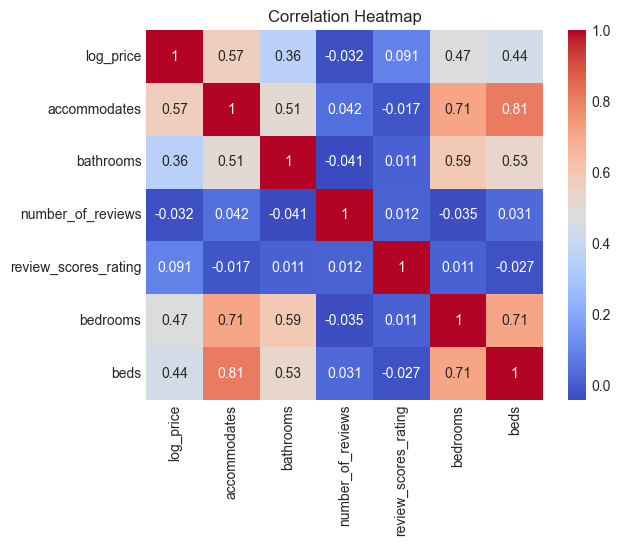

In [11]:
df_numeric = df.select_dtypes(include='number').drop(columns=['latitude', 'longitude'])
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
numerical_columns = df.select_dtypes(include='number').drop(columns=['latitude', 'longitude'])
target_correlation = numerical_columns.corr()['log_price'].abs().sort_values(ascending=False)

target_correlation

log_price               1.000000
accommodates            0.567574
bedrooms                0.473212
beds                    0.442153
bathrooms               0.355420
review_scores_rating    0.091219
number_of_reviews       0.032470
Name: log_price, dtype: float64

> We can interpret these results as follows:

> 1- There is a moderate positive correlation between "accommodates", "bedrooms" and "beds" and "log_price". This usually means that as the house's capacity for accommodation (including the number of bedrooms and beds) increases, so does the price.

> 2- There is also a positive correlation between "bathrooms" and "log_price", but not as strong as "accommodates" and other bedroom/bathroom features.

> 3- Correlations between "review_scores_rating" and "number_of_reviews" are quite low. The direct relationship of these variables to "log_price" is very weak or almost non-existent.

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


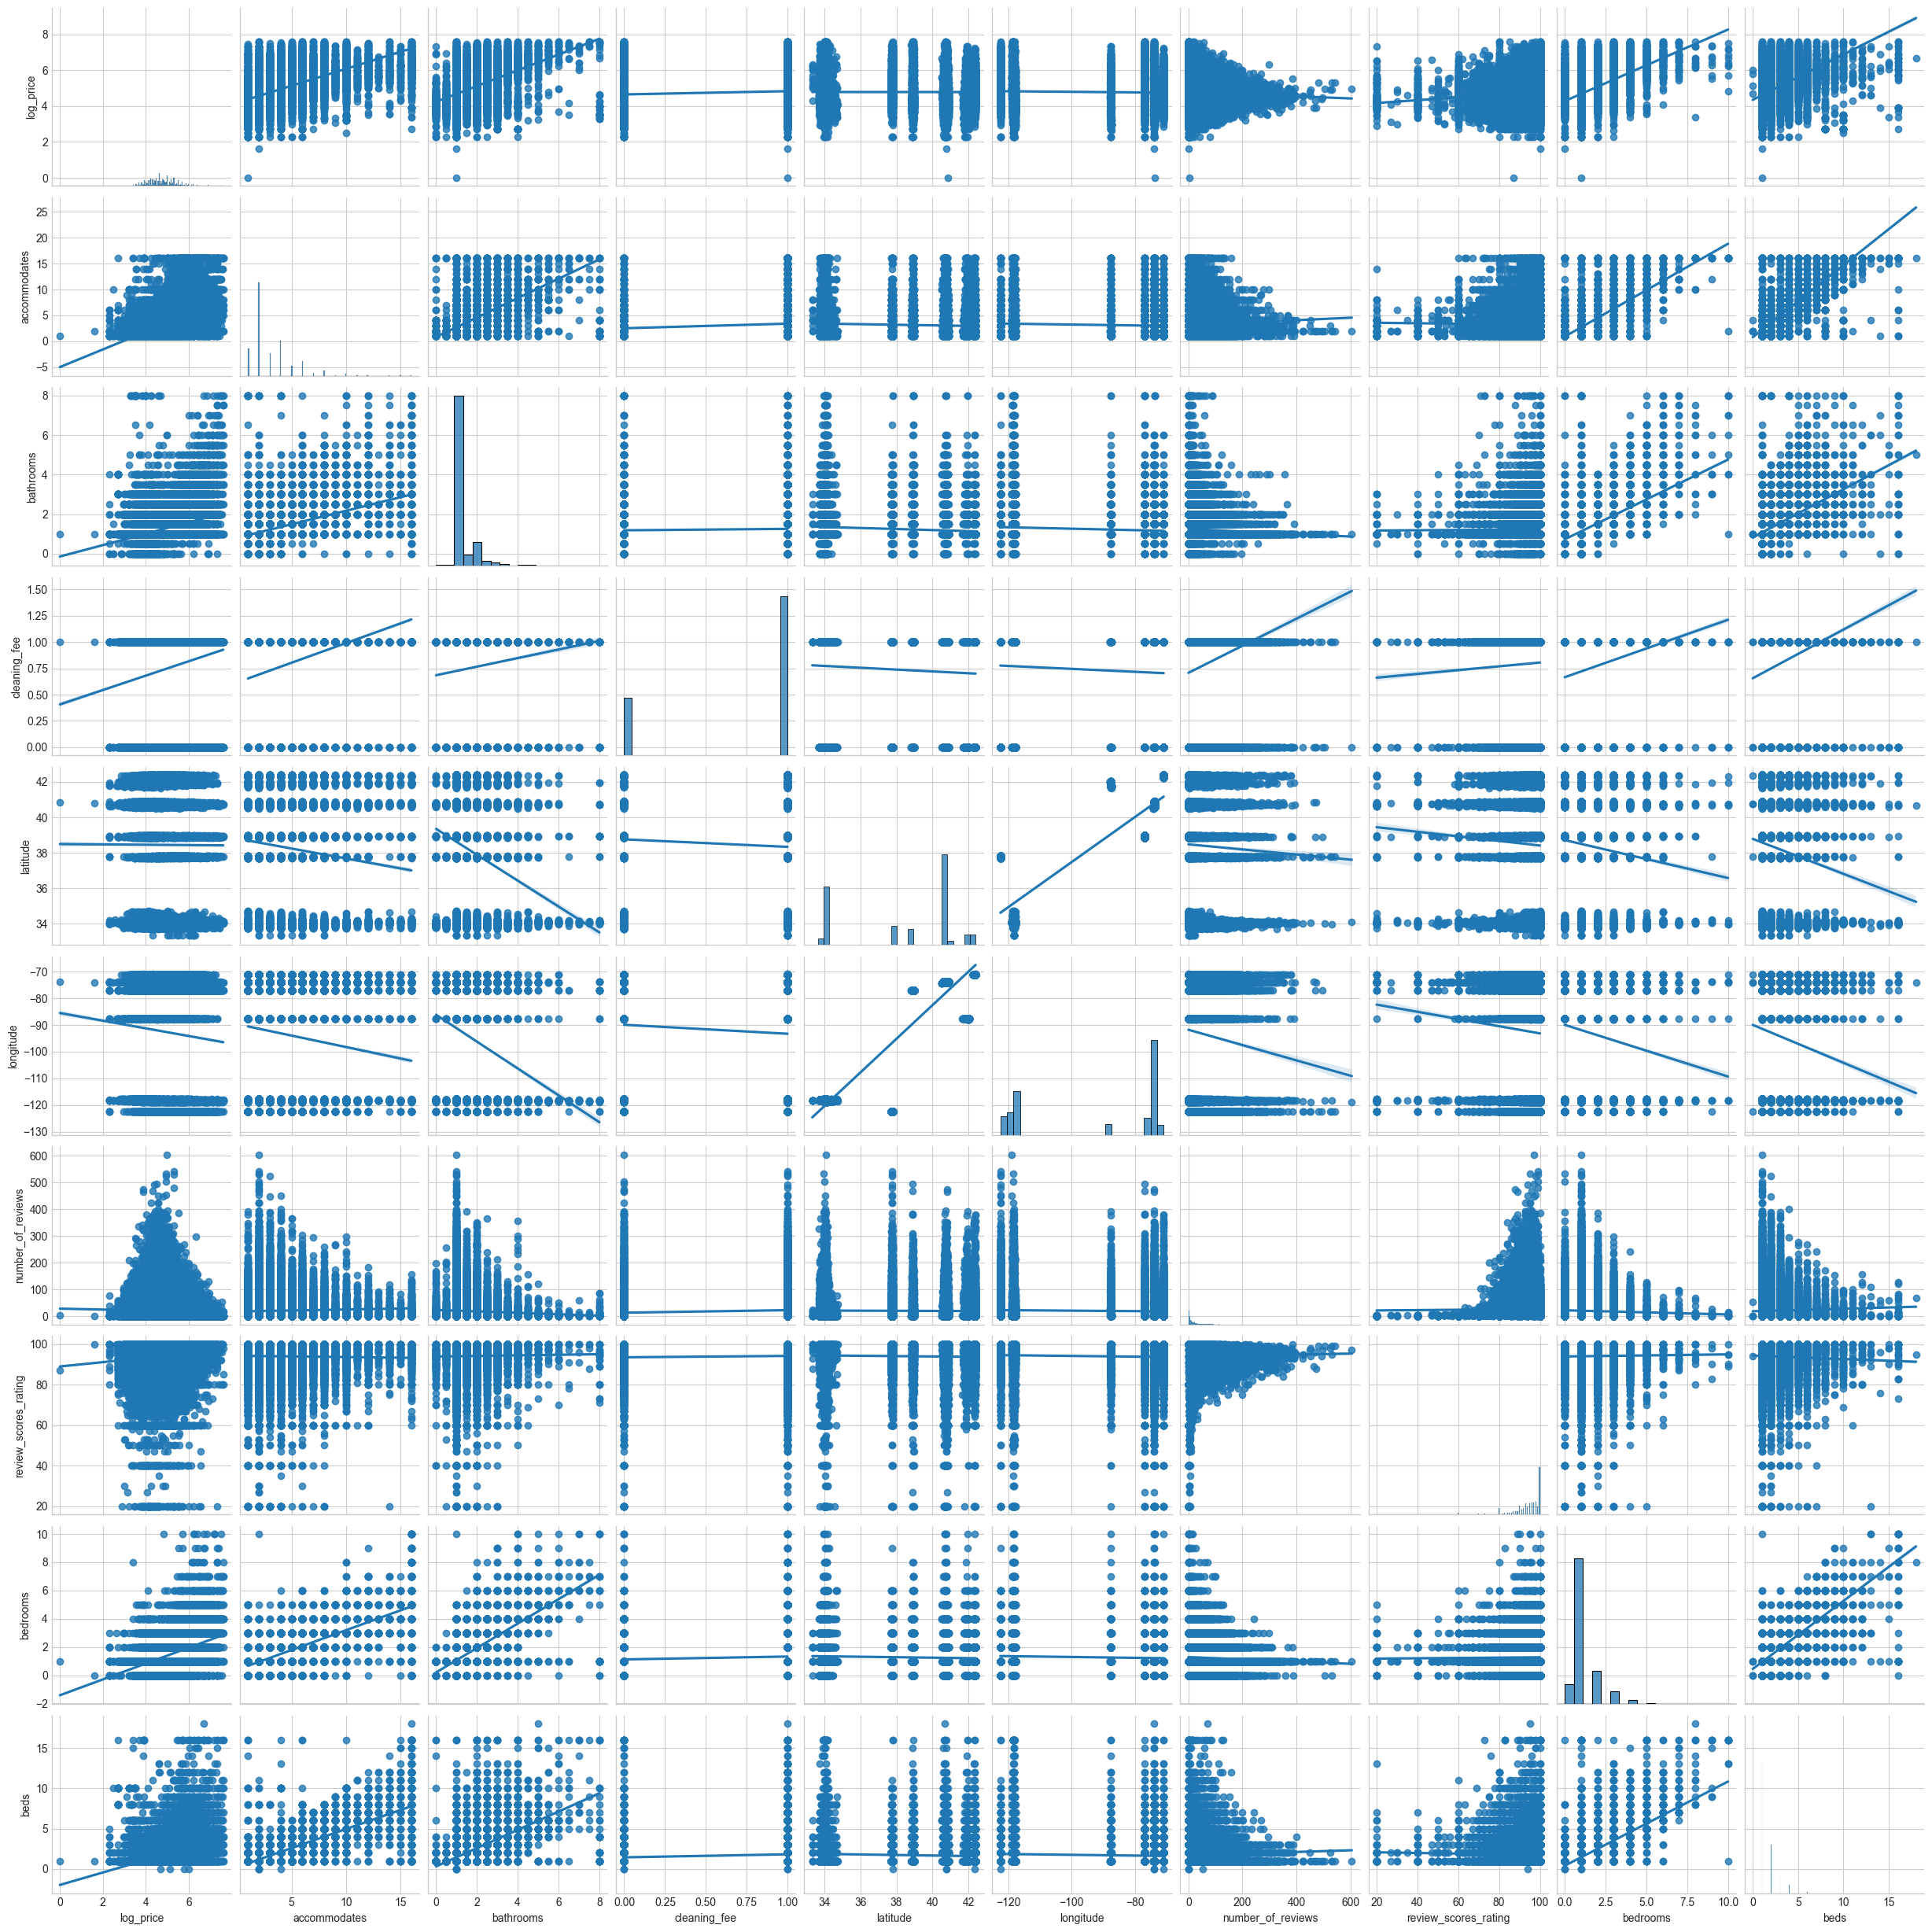

In [13]:
import seaborn as sns
sns.pairplot(df, kind  ="reg");

<a id = "4"></a><br>
## Target Review

In [14]:
target = df['log_price']
df['price'] = np.exp(target)
df['price']

0        150.0
1        169.0
2        145.0
3        750.0
4        115.0
         ...  
74106    100.0
74107    155.0
74108    185.0
74109    195.0
74110    128.0
Name: price, Length: 74111, dtype: float64

> Using the np.exc() function, the inverse of the logarithmic transformation is applied for the log_price column.
Purpose: to reach the original target and examine it

before  outlier handle ...df_original
count    74111.000000
mean       160.370849
std        168.580415
min          1.000000
25%         75.000000
50%        111.000000
75%        185.000000
max       1999.000000

After suppressing outliers to upper_limit and lower limit with iqr method (outlier detected in 5726 lines).........df

count    74111.000000
mean       140.458893
std         89.894990
min          1.000000
25%         75.000000
50%        111.000000
75%        185.000000
max        350.000000


After outlier handle operation with z score (1593 lines outlier output)...df2
count    74111.000000
mean       142.086111
std        102.636085
min          1.000000
25%         75.000000
50%        111.000000
75%        175.000000
max        662.000000


If we find outliers with iqr and fill them with median....df3
count    74111.000000
mean       121.143272
std         66.648622
min          1.000000
25%         75.000000
50%        100.000000
75%        150.000000
max        349.000000


Based on the presented table, it seems reasonable to handle outliers using Z-score. When applying the IQR (Interquartile Range) method with an upper threshold of 350, there is a significant concentration of data points at 350. Additionally, when examining the outlier graph, we observe a drop in the maximum value from 2000 to 600, indicating the presence of outliers. Moreover, the log transformation brings the distribution closer to a normal distribution.

Hence, considering these observations, our final decision is to handle outliers using Z-score.

In [15]:
# We are taking only the 'price' column
price_column = df['price']

# Calculating mean and standard deviation for the 'price' column to compute Z-scores
price_mean = price_column.mean()
price_std = price_column.std()

# Calculating Z-scores
z_scores = (price_column - price_mean) / price_std

# Set the threshold for identifying outliers
z_score_threshold = 3  # defining the threshold value

# Replacing outliers with the mean value
outliers_count = np.sum(z_scores.abs() > z_score_threshold)
price_column = np.where(z_scores.abs() > z_score_threshold, price_mean, price_column)

# Adding the modified 'price' column back to the dataset
df['price'] = price_column

# Displaying the modified 'price' column and the number of outliers
print("Modified 'price' column:")
print(df['price'])

print("Number of outliers:", outliers_count)


Modified 'price' column:
0        150.000000
1        169.000000
2        145.000000
3        160.370849
4        115.000000
            ...    
74106    100.000000
74107    155.000000
74108    185.000000
74109    195.000000
74110    128.000000
Name: price, Length: 74111, dtype: float64
Number of outliers: 1593


In [16]:
df['price'].describe()

count    74111.000000
mean       142.086111
std        102.636085
min          1.000000
25%         75.000000
50%        111.000000
75%        175.000000
max        662.000000
Name: price, dtype: float64

In [17]:
df1=df_original.copy()

In [18]:
# Exponential transformation (Inverse of logarithmic transformation)
df1['price'] = np.exp(df1['log_price'])
print(df1['price'])

0        150.0
1        169.0
2        145.0
3        750.0
4        115.0
         ...  
74106    100.0
74107    155.0
74108    185.0
74109    195.0
74110    128.0
Name: price, Length: 74111, dtype: float64


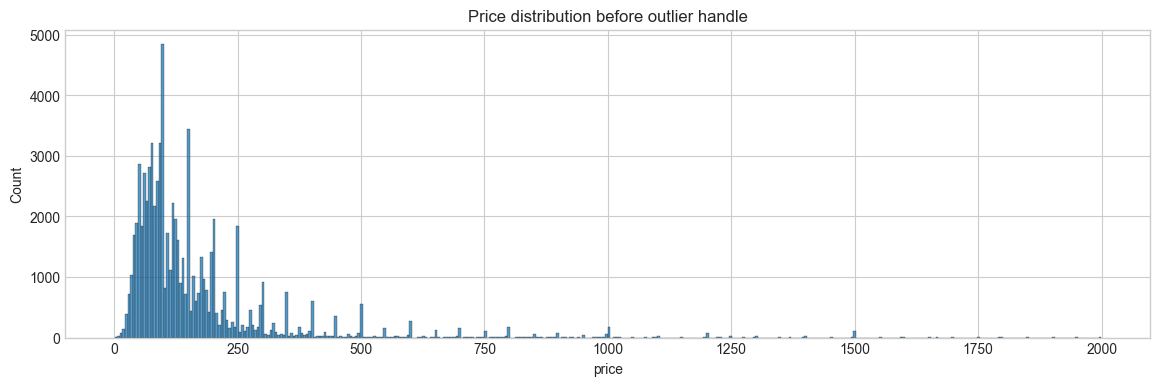

In [19]:

plt.figure(figsize = (14, 4))
sns.histplot(df1["price"])
plt.title('Price distribution before outlier handle')
plt.show()

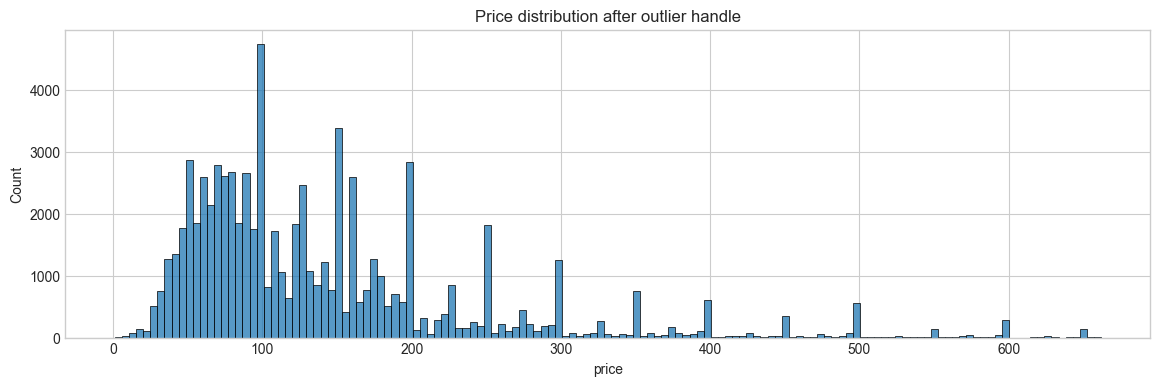

In [20]:
plt.figure(figsize = (14, 4))
sns.histplot(df["price"])
plt.title('Price distribution after outlier handle')
plt.show()

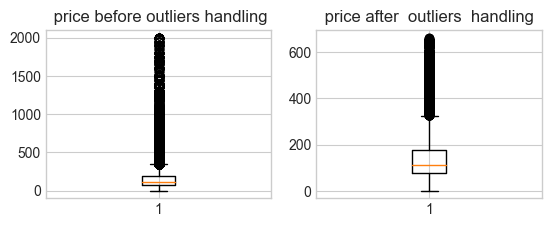

In [21]:
# Displaying the price column with a box plot
plt.figure()
plt.subplot(2, 2, 1)
plt.boxplot(df1['price'])
plt.title(f" {'price'} before outliers handling")

plt.subplot(2, 2, 2)
plt.boxplot(df['price'])
plt.title(f" {'price'} after  outliers  handling ")

plt.show()

In [22]:
## Normality Test -price-
# Shapiro-Wilk test
shapiro_stat, shapiro_pvalue = stats.shapiro(df['price'])
shapiro_normal = shapiro_pvalue > 0.05
print(f"Shapiro-Wilk test - Normal: {shapiro_normal}")

Shapiro-Wilk test - Normal: False


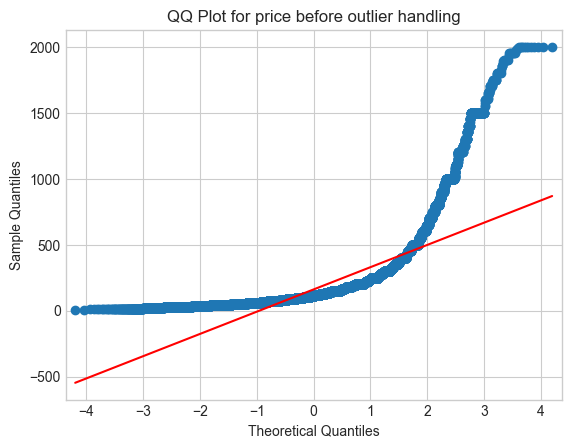

In [23]:
import statsmodels.api as sm
# Perform normality check using QQ plot
# Create QQ plot
#df1=df_original
sm.qqplot(df1['price'], line='s')
plt.title(f"QQ Plot for {'price'} before outlier handling")
plt.show()

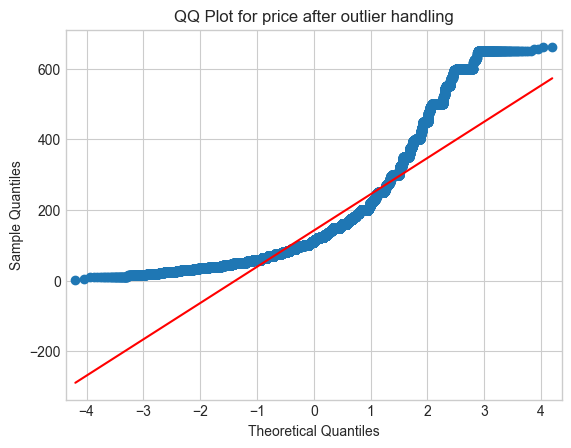

In [24]:
import statsmodels.api as sm
# Perform normality check using QQ plot
# Create QQ plot
sm.qqplot(df['price'], line='s')
plt.title(f"QQ Plot for {'price'} after outlier handling")
plt.show()

In [26]:
df1['log_price'].skew()

0.5146954132526429

In [27]:
df_original['log_price'].skew()

0.5146954132526429

## Transformation price

!!
clarification: Outliers of the price column have not been handled yet. but we wanted to see the transformation of the column. will be rearranged after outliers are decided


Text(0.5, 1.0, 'power_price in Power Transformation')

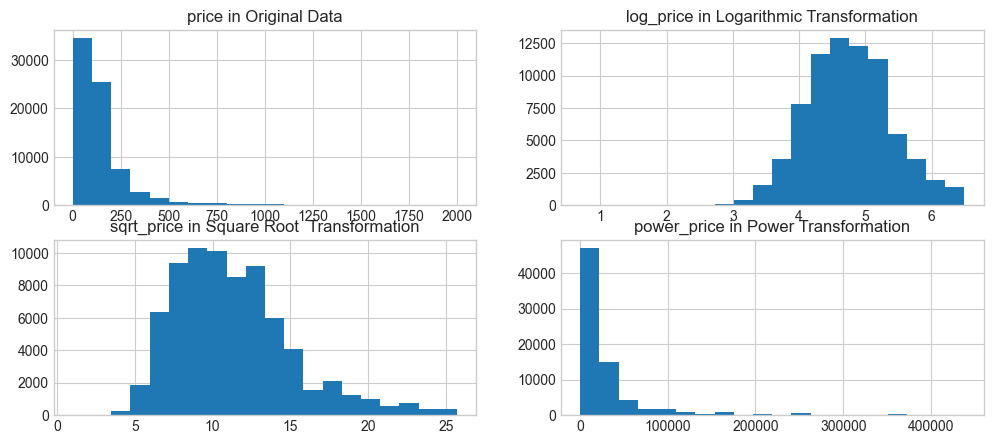

In [28]:
log_price = df['price']
log_transformed_df = np.log1p(log_price)

sqrt_price = df['price']
sqrt_transformed_df = np.sqrt(sqrt_price)

power_price = df['price']
power_transformed_df = np.power(power_price, 2)

plt.figure(figsize=(12, 5))
#log transformation
plt.subplot(2, 2, 1)
plt.hist(df1['price'], bins=20)
plt.title('price in Original Data')
plt.subplot(2, 2, 2)
plt.hist(log_transformed_df, bins=20)
plt.title(f'log_price in Logarithmic Transformation')
#Square Root Transformation
plt.subplot(2, 2, 3)
plt.hist(sqrt_transformed_df, bins=20)
plt.title(f'sqrt_price in Square Root  Transformation')
#Power Transformation
plt.subplot(2, 2, 4)
plt.hist(power_transformed_df, bins=20)
plt.title(f'power_price in Power Transformation')

> As can be seen from the graph, the best option is Logarithmic Transformation

In [29]:
# Perform the logarithmic transformation using np.log1p() function on the 'price' column
df['log_price_new'] = np.log1p(df['price'])

# Add the 'log_price_new' column to the DataFrame and display the result
print(df[['price', 'log_price_new']])

            price  log_price_new
0      150.000000       5.017280
1      169.000000       5.135798
2      145.000000       4.983607
3      160.370849       5.083705
4      115.000000       4.753590
...           ...            ...
74106  100.000000       4.615121
74107  155.000000       5.049856
74108  185.000000       5.225747
74109  195.000000       5.278115
74110  128.000000       4.859812

[74111 rows x 2 columns]


In [30]:
df[['log_price','log_price_new']]

log_price  log_price_new
0       5.010635       5.017280
1       5.129899       5.135798
2       4.976734       4.983607
3       6.620073       5.083705
4       4.744932       4.753590
...          ...            ...
74106   4.605170       4.615121
74107   5.043425       5.049856
74108   5.220356       5.225747
74109   5.273000       5.278115
74110   4.852030       4.859812

[74111 rows x 2 columns]

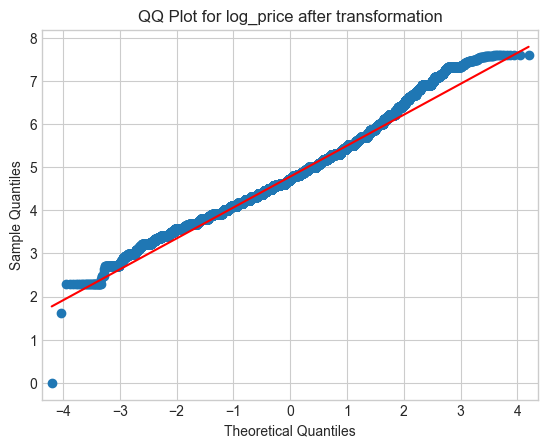

In [31]:
import statsmodels.api as sm
# Perform normality check using QQ plot
# Create QQ plot
sm.qqplot(df_original['log_price'], line='s')
plt.title(f"QQ Plot for {'log_price'} after transformation")
plt.show()

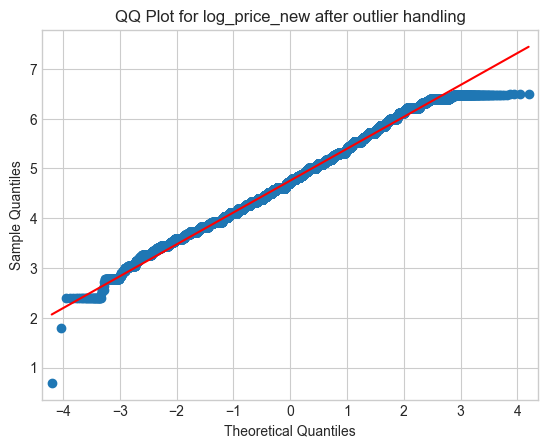

In [32]:
import statsmodels.api as sm
# Perform normality check using QQ plot
# Create QQ plot
sm.qqplot(df['log_price_new'], line='s')
plt.title(f"QQ Plot for {'log_price_new'} after outlier handling")
plt.show()

<a id = "5"></a><br>
## Categorical Variable

In [33]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
categorical_columns

['property_type',
 'room_type',
 'amenities',
 'bed_type',
 'cancellation_policy',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'name',
 'neighbourhood',
 'thumbnail_url',
 'zipcode']

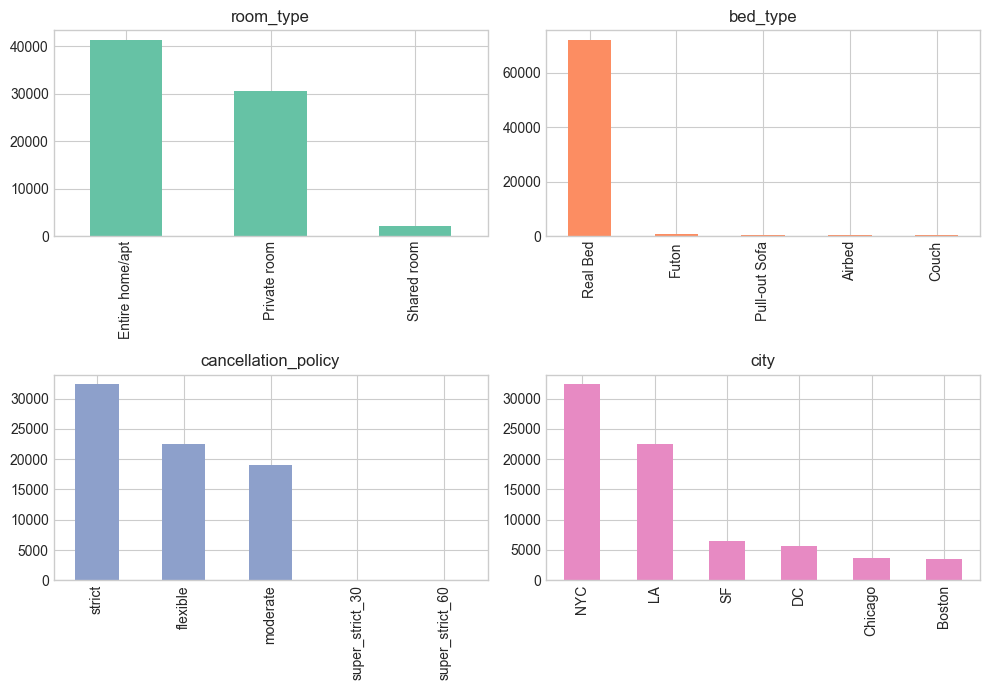

In [34]:
plt.figure(figsize=(10, 7))

columns = ['room_type', 'bed_type', 'cancellation_policy', 'city']
colors = sns.color_palette('Set2', len(columns)) 

for i, column in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    df[column].value_counts().plot(kind='bar', title=column, color=colors[i])
    plt.xlabel('')

plt.tight_layout()
plt.show()

<a id = "6"></a><br>
## Numerical Variable

In [35]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical_columns

Index(['log_price', 'accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
       'price', 'log_price_new'],
      dtype='object')

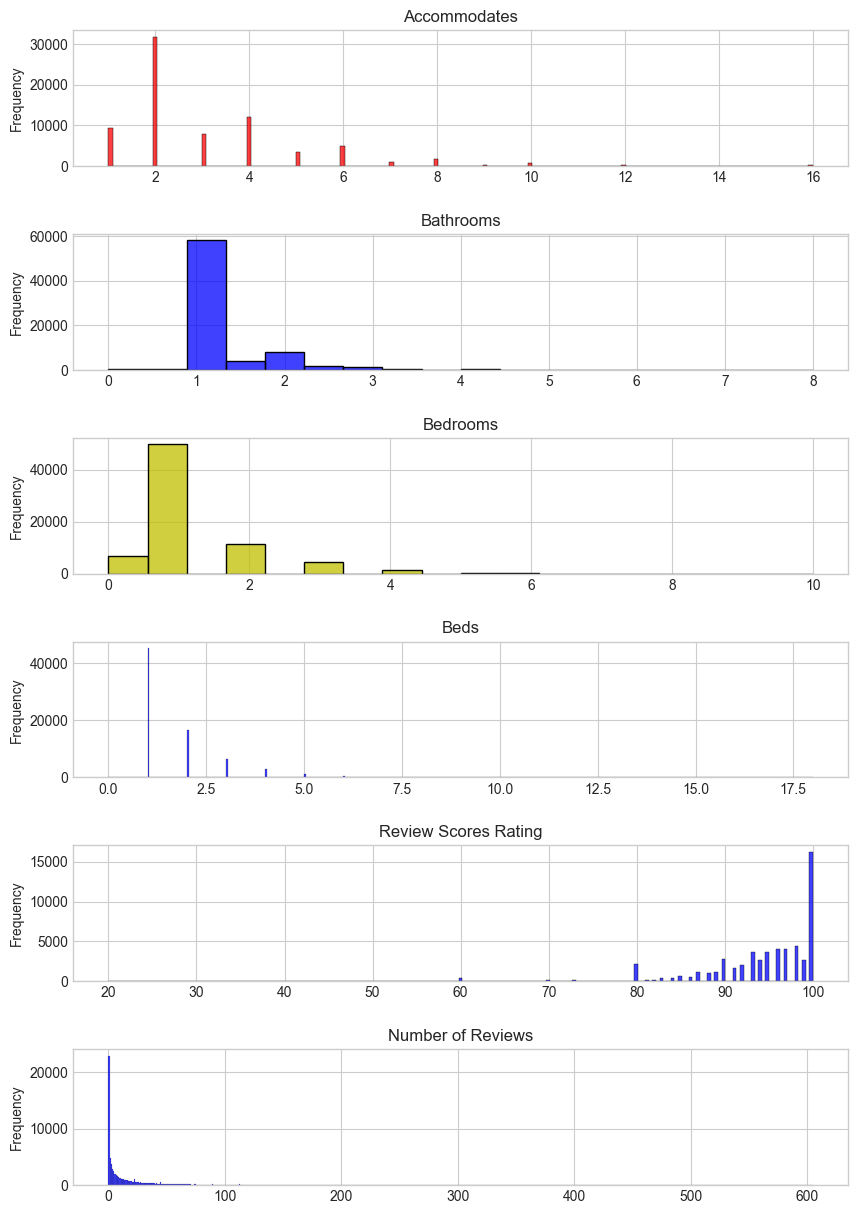

In [36]:
fig, ax = plt.subplots(6, 1, figsize=(10, 15))
plt.subplots_adjust(hspace=0.5)

columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews']
colors = ['r', 'b', 'y', 'b', 'b', 'b']
titles = ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Review Scores Rating', 'Number of Reviews']

for i in range(len(columns)):
    sns.histplot(df[columns[i]], color=colors[i], ax=ax[i])
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Frequency')

plt.show()

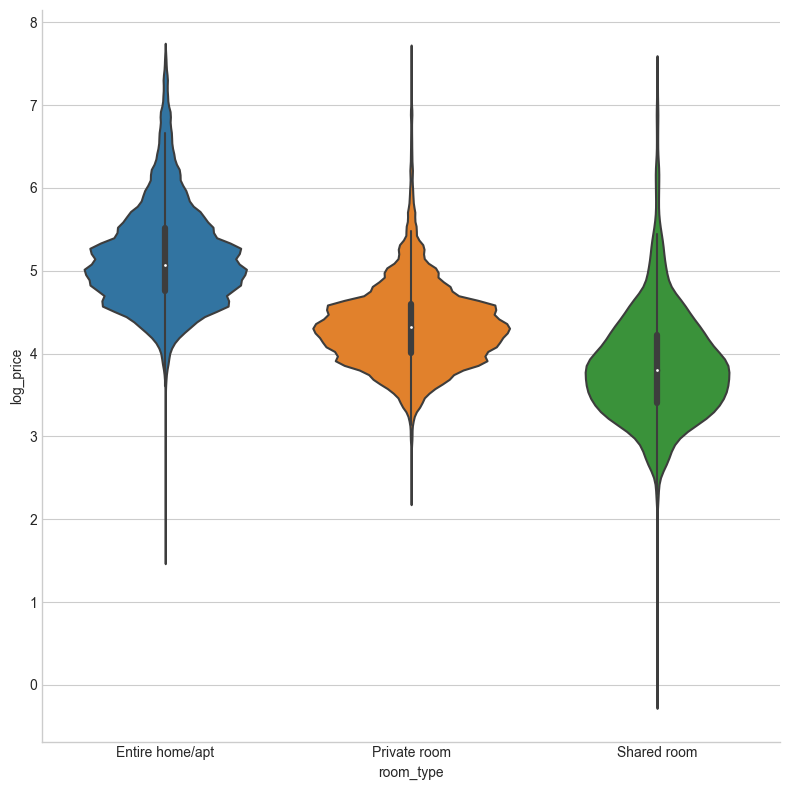

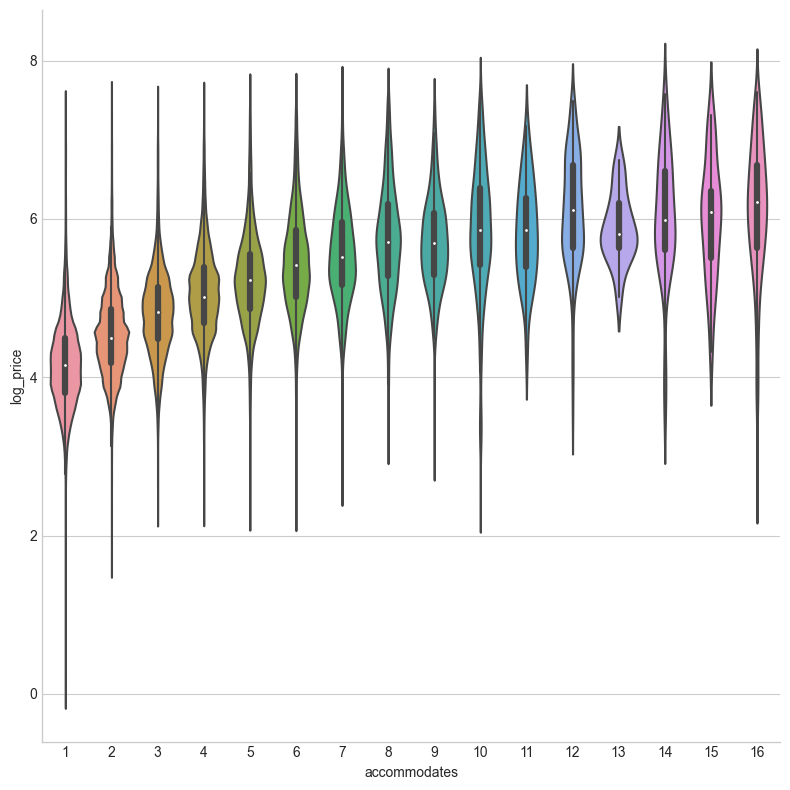

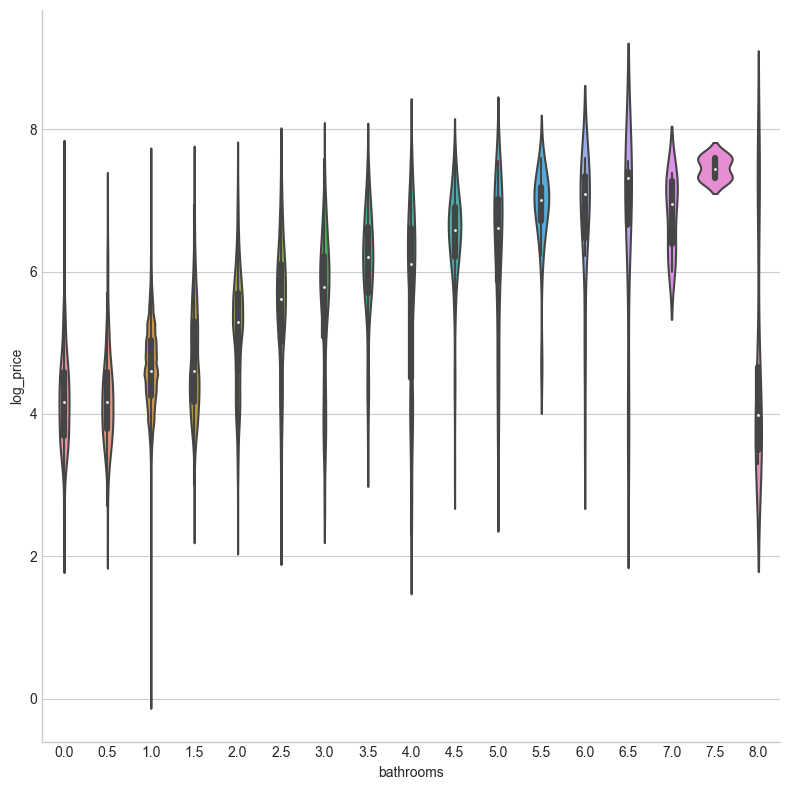

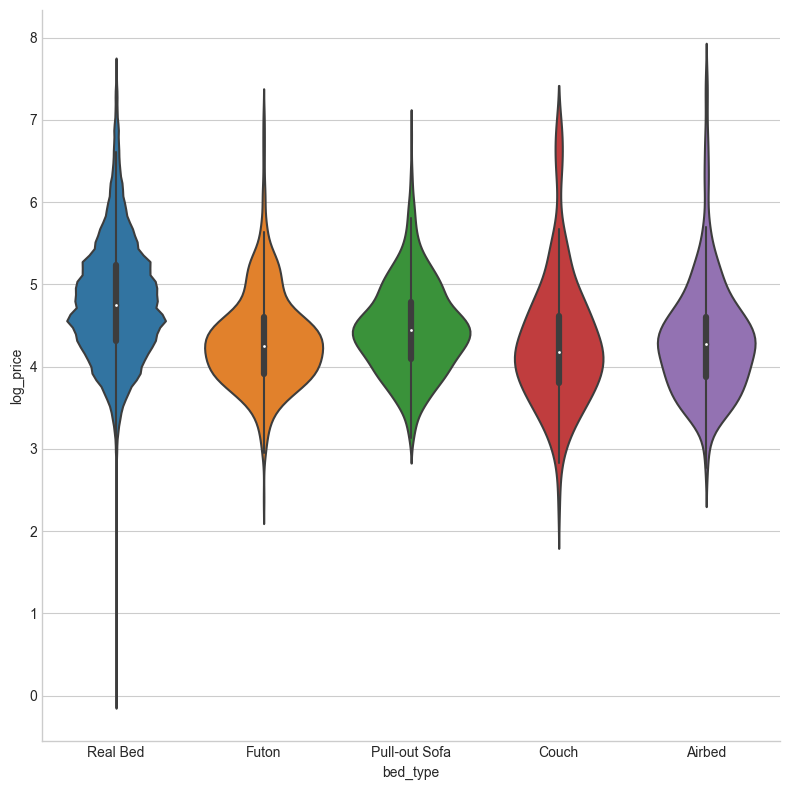

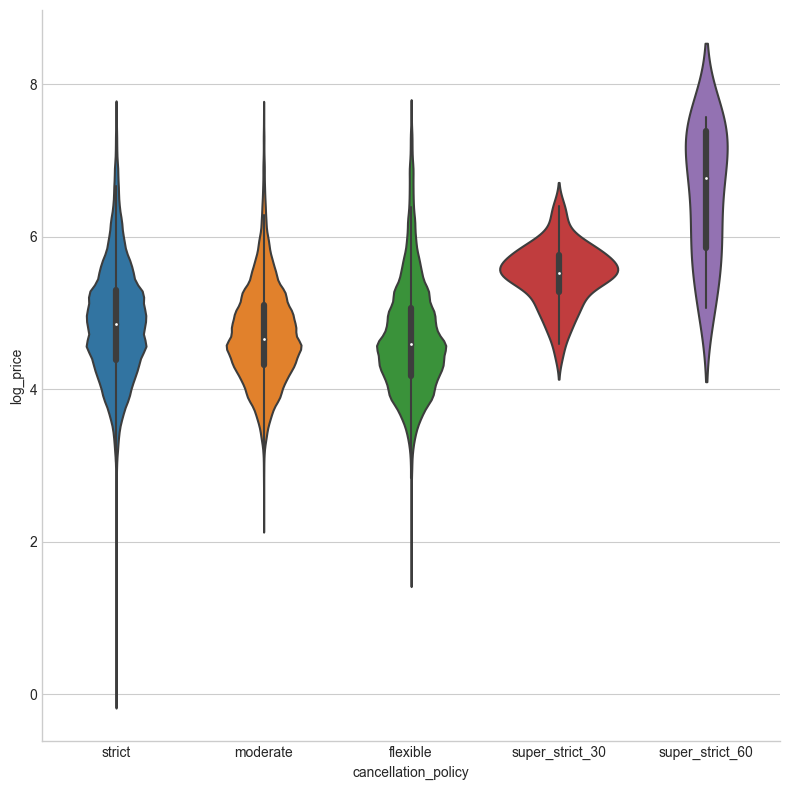

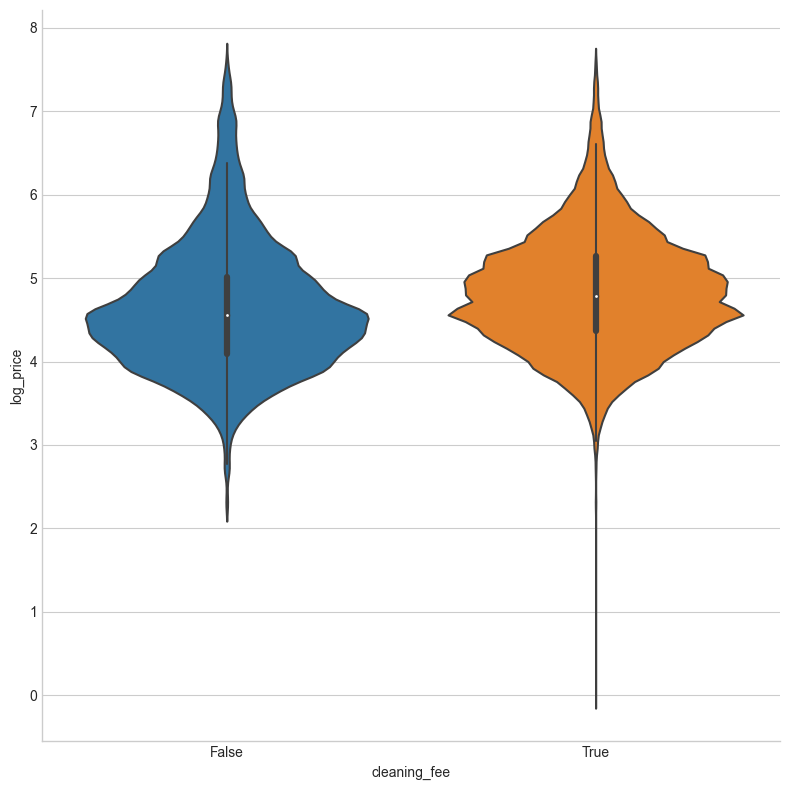

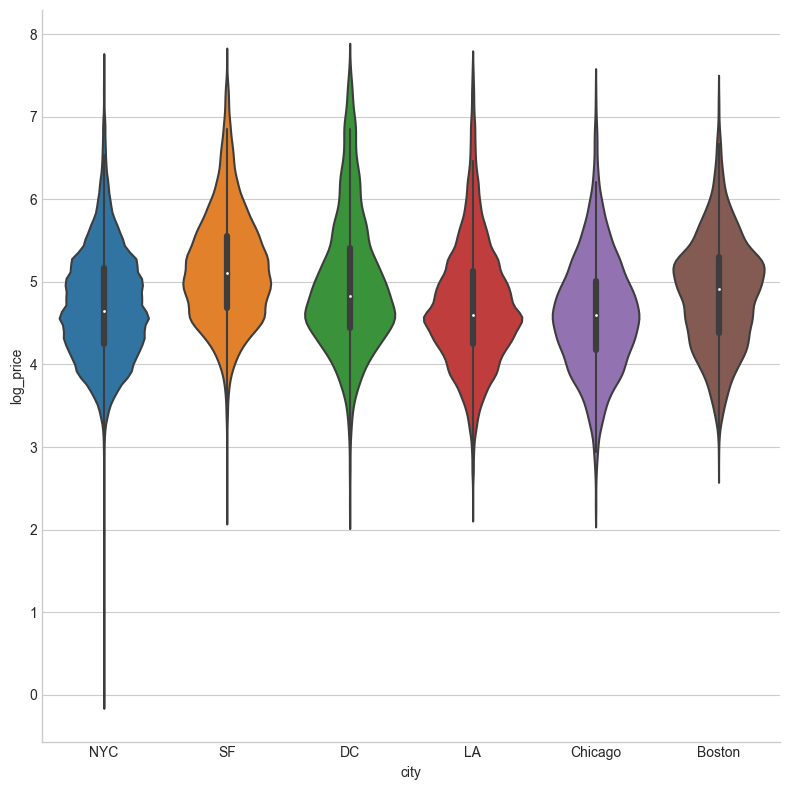

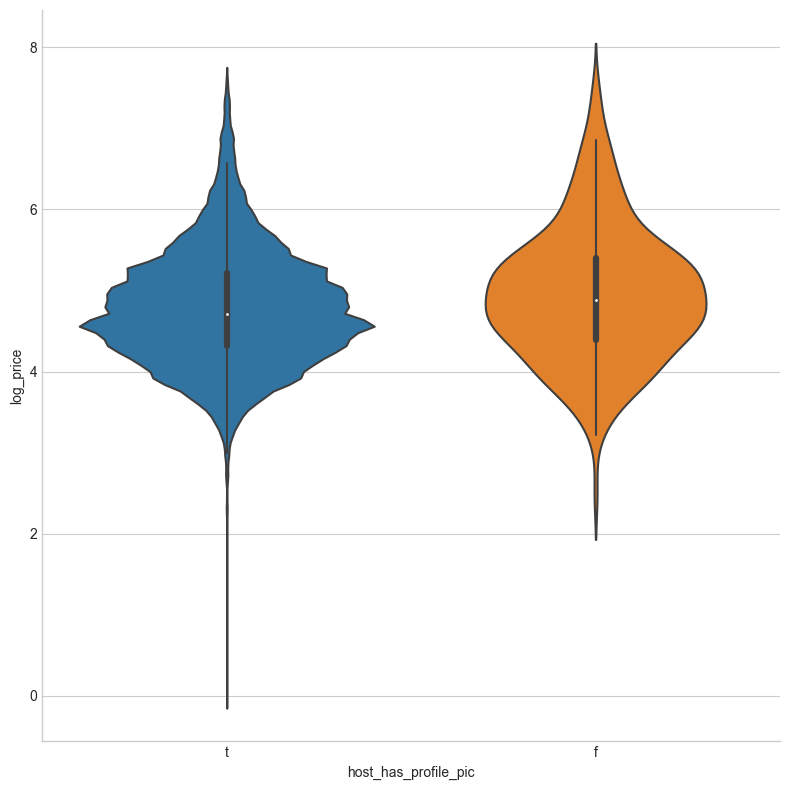

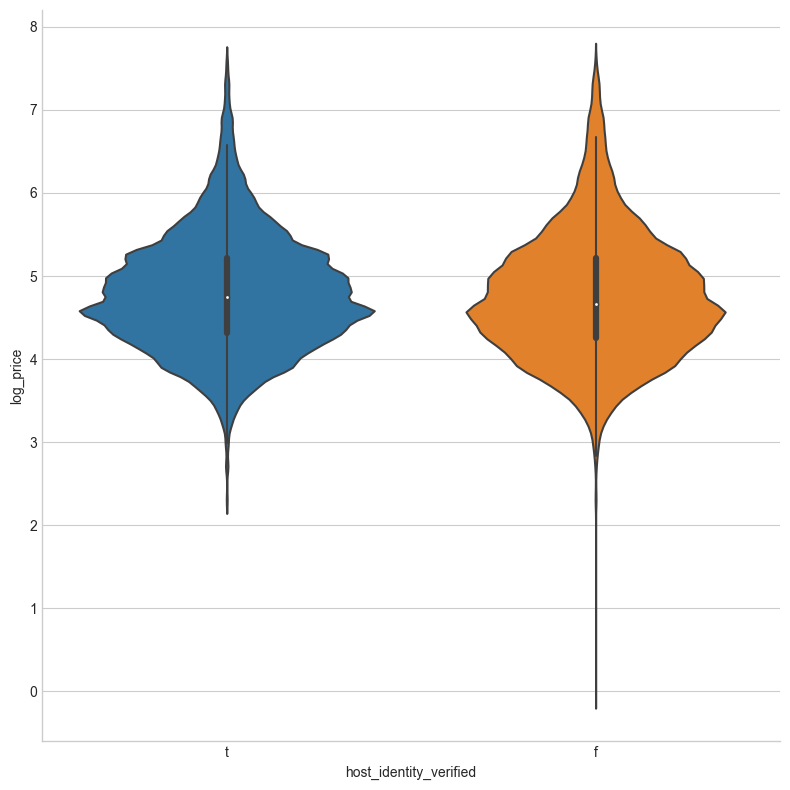

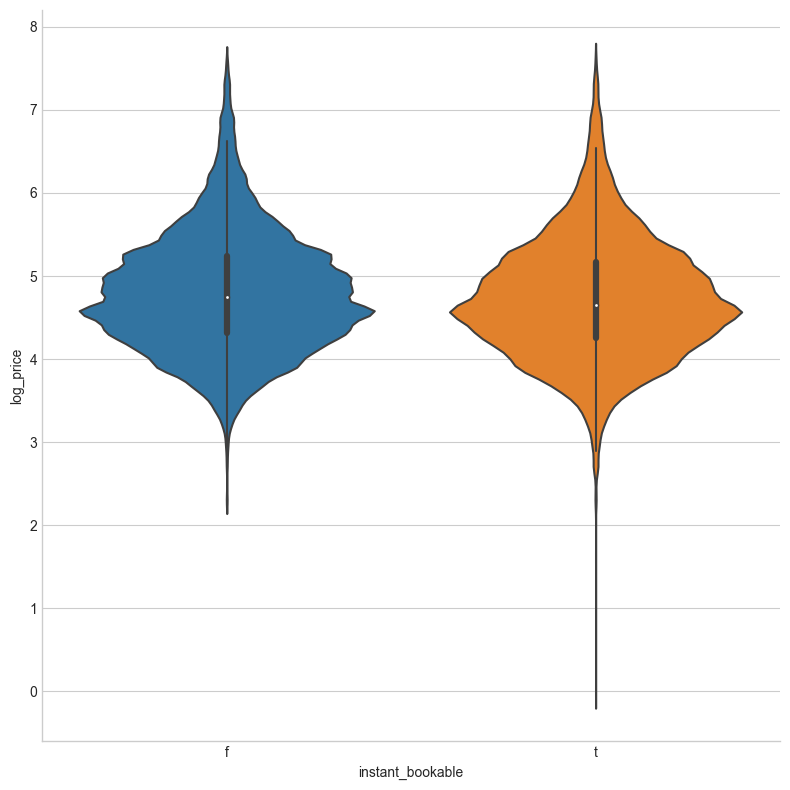

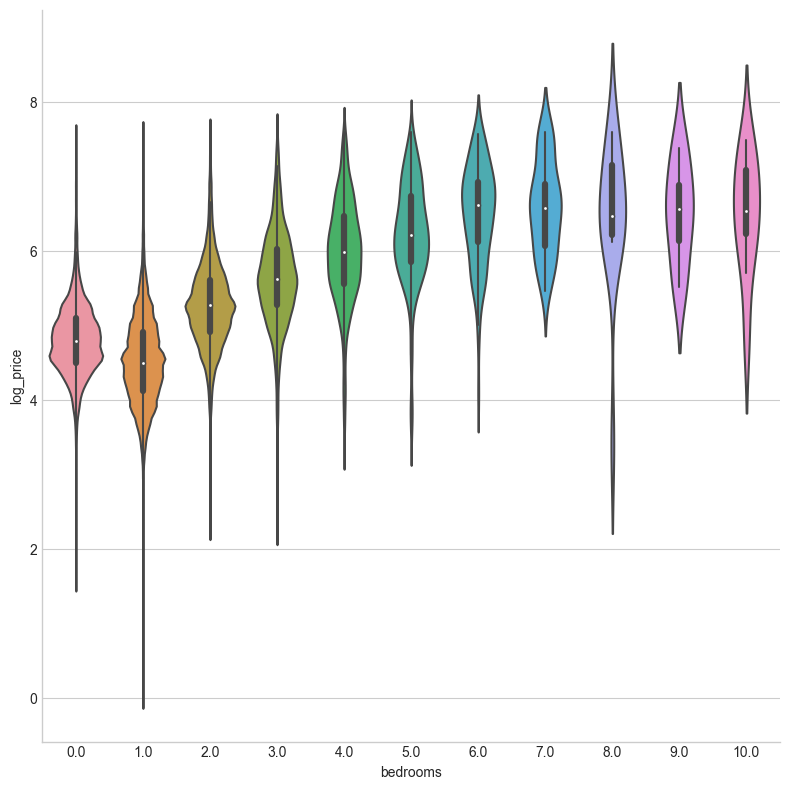

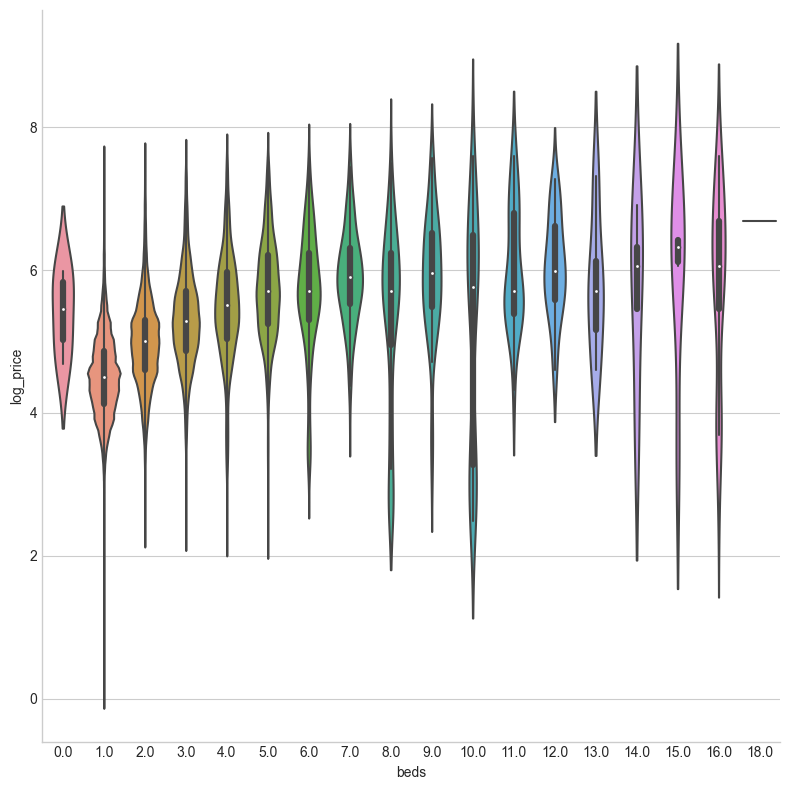

In [37]:
def catplot(column):
    if len(df[column].unique()) <= 20:
        g = sns.catplot(x=column, y="log_price", data=df, kind="violin", height=8)
        g.set_ylabels("log_price")
        plt.show()

for i in df.columns :
    catplot(i)        

4. <a id = "7"></a><br>
# Missing Value

<a id = "8"></a><br>
## Find Missing Value

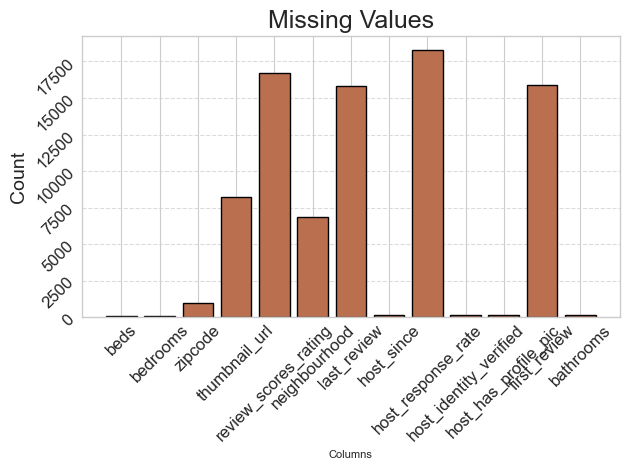

In [38]:
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Create a vertical bar chart to show missing values
plt.bar(missing_values.index, missing_values.values, color='#BA704F', edgecolor='black')

# Customize the chart
plt.title('Missing Values', fontsize=18)
plt.xlabel('Columns', fontsize=8)
plt.ylabel('Count', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12, rotation=45)  # Rotate the x-axis labels for better visibility
plt.gca().invert_xaxis()  # Display bars from right to left
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add vertical grid lines

# Show the plot
plt.tight_layout()
plt.show()

<a id = "9"></a><br>
## Fill Missing Value

* bathrooms

In [39]:
filtered_bath = df[(df['description'].str.contains('bathroom', na=False)) & (df['bathrooms'].isna())]

In [40]:
def convert_bathroom_description(description):
    #if ('one bathroom') or ('1 bathroom') or ('1full') or ('full') or ('shared') or ('Shared') or ('Private') or ('SHARED') or ('attractive') in description.lower():
    #    return 1
    if ("two bathrooms") or  ('2 bathrooms') in description.lower():
        return 2
    elif '3 bathrooms' in description.lower():
        return 3
    elif '4 bathrooms' in description.lower():
        return 4 
    elif ('one bathroom') or ('1 bathroom') or ('1full') or ('full') or ('shared') or ('Shared') or ('Private') or ('SHARED') or ('attractive') in description.lower():
        return 1
    else:
        #return 1
        return None

# Print the results from the "filtered_bath" DataFrame as numeric values in the "bathrooms" column
df.loc[filtered_bath.index, 'bathrooms'] = filtered_bath['description'].apply(convert_bathroom_description)

In [41]:
df['bathrooms'] = df['bathrooms'].fillna(1)

* bedrooms

In [42]:
import numpy as np

keywords = ['one bedroom', 'bedroom', 'two bedrooms', 'bedrooms']

# Filter rows where the 'description' column contains the keywords and the 'bedrooms' column is NaN
filtered_data = df[(df['description'].str.contains('|'.join(keywords), na=False)) & (df['bedrooms'].isna())]

'''# Fill the 'bedrooms' column with 1 for specific 'id' values
ids = filtered_data['id'].tolist()  # Get the id values from the filtered dataset
df.loc[df['id'].isin(ids), 'bedrooms'] = df.loc[df['id'].isin(ids), 'bedrooms'].fillna(1)'''

# Get the number of observations in the filtered dataset
num_rows = len(filtered_data)
print("Number of observations in the filtered dataset:", num_rows)

Number of observations in the filtered dataset: 8


The purpose of this code is to filter rows that have specific keywords in the 'description' column and empty 'bedrooms' values. It then updates the 'bedrooms' column for these filtered rows to 1 and prints the number of observations in the filtered dataset.

In [43]:
df["bedrooms"] = df['bedrooms'].fillna((df["bedrooms"].mean()))

* thumbnail_url

In [44]:
# We fill the filled values with 1 and the empty values with 0 in the thumbnail_url column.
df['thumbnail_url'] = df['thumbnail_url'].apply(lambda x: 1 if pd.notna(x) else 0)

* zipcode

In [45]:
df['zipcode'] = pd.to_numeric(df['zipcode'],errors='coerce')

In [46]:
correlation = df['log_price'].corr(df['zipcode'])
print("Correlation:", correlation)

Correlation: 0.03402257978807776


In [47]:
#pip install uszipcode    # installing Library to find zip code from latitude and longitude information using us zip code
from uszipcode import SearchEngine

search = SearchEngine()
zipcodes = []
for index, row in df.iterrows():
    latitude = row['latitude']  # Latitude 
    longitude = row['longitude']  # Longitude 

    result = search.by_coordinates(latitude, longitude)
    if result:
        zipcode = result[0].zipcode
        zipcodes.append(zipcode)
    else:
        zipcodes.append(None)  # None if postal code not found or incorrect

df['Zipcode'] = zipcodes  # Adds a new Zipcode column

In [48]:
df[['Zipcode','zipcode']].head(5)   #comparing two columns for first observation

Zipcode  zipcode
0   11201  11201.0
1   10019  10019.0
2   10037  10027.0
3   94115  94117.0
4   20010  20009.0

In [49]:
filtered_zip =df[df['Zipcode'].isna()][['neighbourhood','city','latitude','zipcode']]
print(filtered_zip)

      neighbourhood city   latitude  zipcode
2461            NaN   LA  33.343574  90704.0
4317            NaN   LA  33.339327  90704.0
18396           NaN   LA  33.343624  90704.0
26402           NaN   LA  33.343287  90704.0
27138           NaN   LA  33.354491  90704.0
27310           NaN   LA  33.353834  90704.0
31296           NaN   LA  33.345148  90704.0
42232           NaN   LA  33.338905  90704.0
44131           NaN   LA  33.340521  90704.0
46773           NaN   LA  33.352373  90704.0
59902           NaN   LA  33.339007  90704.0
63200           NaN   LA  33.339002  90704.0
64969           NaN   LA  33.340916  90704.0
69934           NaN   LA  33.343011  90704.0


In [50]:
df = df.drop(filtered_zip.index)

* Neighbourhood

In [51]:
#df['neighbourhood']=df_original['neighbourhood'].copy()
df['city']=df_original['city'].copy()

from uszipcode import SearchEngine
from geopy.geocoders import Nominatim
# taking zipcodes
zipcodes = df['Zipcode']
#print(zipcodes)

The method of imputing missing values is used. By using the values in the City and Zip code columns, the neighborhood column has been imputed and the number of missing values has been reduced to 1864.

In [52]:

#Fill in missing values by matching `city` and `Zipcode` columns
df['neighbourhood'] = df.apply(lambda row: df.loc[(df['city'] == row['city']) & (df['Zipcode'] == row['Zipcode']), 'neighbourhood'].values[0] if pd.isnull(row['neighbourhood']) else row['neighbourhood'], axis=1)

# printing results
#print(df[['neighbourhood', 'Zipcode', 'city']])


* Filling the Neighbor column from another dataset

In [53]:
usneighborhoods_df = pd.read_csv('usneighborhoods.csv')

# 1. Finding empty values in the neighborhood column in airbnb data
missing_neighbourhoods = df[df['neighbourhood'].isnull()]

## Searching the usneighborhoods data for nulls found using their zipcodes
for index, row in missing_neighbourhoods.iterrows():
    zipcode = row['zipcode']
    matching_neighbour = usneighborhoods_df[usneighborhoods_df['zipcode'] == zipcode]['neighbor'].values
    
    #  Fill in the empty neighbor column in the airbnb data if a matching neighbor is found
    if len(matching_neighbour) > 0:
        df.at[index, 'neighbourhood'] = matching_neighbour[0]
## Searching the usneighborhoods data for nulls found using their Zipcode column
for index, row in missing_neighbourhoods.iterrows():
    zipcode = row['Zipcode']
    matching_neighbour = usneighborhoods_df[usneighborhoods_df['zipcode'] == zipcode]['neighbor'].values
    
    # Fill in the empty neighbor column in the airbnb data if a matching neighbor is found
    if len(matching_neighbour) > 0:
        df.at[index, 'neighbourhood'] = matching_neighbour[0]

# result
print(df[['neighbourhood', 'Zipcode', 'latitude', 'longitude']])


          neighbourhood Zipcode   latitude   longitude
0      Brooklyn Heights   11201  40.696524  -73.991617
1        Hell's Kitchen   10019  40.766115  -73.989040
2                Harlem   10037  40.808110  -73.943756
3          Lower Haight   94115  37.772004 -122.431619
4      Columbia Heights   20010  38.925627  -77.034596
...                 ...     ...        ...         ...
74106      Williamsburg   11211  40.709025  -73.939405
74107     Hermosa Beach   90266  33.871549 -118.396053
74108      Williamsburg   11211  40.706749  -73.942377
74109      West Village   10011  40.738535  -74.000157
74110        Long Beach   90833  33.761096 -118.192409

[74097 rows x 4 columns]


In [54]:
df=df.dropna(subset=['neighbourhood'])

* host_response_rate

In [55]:
df.host_response_rate = df.host_response_rate.apply(lambda x: int(x[:len(x)-1])/100 if isinstance(x,str) else x )
df.host_response_rate = df.host_response_rate.fillna(df.host_response_rate.mean())

* first_review

In [56]:
def fill_missing_first_review_by_city(df):
    # Convert "host_since" and "first_review" columns to date data type.
    df['host_since'] = pd.to_datetime(df['host_since'])
    df['first_review'] = pd.to_datetime(df['first_review'])
    
    # Get unique cities from the "city" column
    cities = df['city'].unique()
    
    # Iterate over each city
    for city in cities:
        # Filter rows matching the current city
        filtered_df = df[df['city'] == city]
        
        # Calculate the average duration between "first_review" and "host_since" on the filtered_df
        average_duration = (filtered_df['first_review'] - filtered_df['host_since']).mean().days
        
        # Fill missing "first_review" values of rows matching the current city with the average value
        df.loc[(df['city'] == city) & (df['first_review'].isnull()), 'first_review'] = df.loc[(df['city'] == city) & (df['first_review'].isnull()), 'host_since'] + pd.DateOffset(days=average_duration)
    
    return df

# Example usage
df = fill_missing_first_review_by_city(df)


In [57]:
df['first_review'].isnull().sum()

42

In [58]:
pd.set_option('display.max_rows', 50)
df[['first_review','last_review']]

first_review last_review
0       2016-06-18  2016-07-18
1       2017-08-05  2017-09-23
2       2017-04-30  2017-09-14
3       2017-02-28         NaN
4       2015-05-12  2017-01-22
...            ...         ...
74106   2014-11-21         NaN
74107   2016-08-15  2017-04-15
74108   2015-01-03  2017-09-10
74109   2019-05-17         NaN
74110   2013-09-05  2017-04-30

[72163 rows x 2 columns]

* last_review

In [59]:
#check with first review 
nan_rows = df[df['first_review'].isnull()]
nan_last_review_count = np.sum(nan_rows['last_review'].isnull())
nan_last_review_count
# We detected that the values that are Nan in the last review are Nan in the first review values.

36

In [60]:
df.last_review.fillna(method="ffill",inplace=True)

* host_since  () 

In [61]:
# Filters empty values in column 'host_since'
filtered_since = df[df['host_since'].isnull()]
#last review filters out empty values from the filtered values
filtered_since =  filtered_since[filtered_since['last_review'].isnull()]
# Returns whether the values in the selected properties are empty after 2 filters
selected_columns = filtered_since[['first_review', 'host_has_profile_pic', 'host_identity_verified']]

In [62]:
#As a result of filtering, we drop these rows because the same row is empty in 7 properties.
df = df.drop(filtered_since.index)

In [63]:
def fill_missing_host_since_by_city(df):
  
    # Get unique cities from the "city" column
    cities = df['city'].unique()
    
    # Iterate over each city
    for city in cities:
        # Filter rows matching the current city
        filtered_df = df[df['city'] == city]
        
        # Calculate the average duration between "first_review" and "host_since" on the filtered_df
        average_duration = (filtered_df['host_since'] - filtered_df['first_review']).mean().days
        
        # Fill missing "first_review" values of rows matching the current city with the average value
        df.loc[(df['city'] == city) & (df['host_since'].isnull()), 'host_since'] = df.loc[(df['city'] == city) & (df['host_since'].isnull()), 'first_review'] + pd.DateOffset(days=average_duration)
    
    return df

# Example usage
df = fill_missing_host_since_by_city(df)

In [64]:
df['host_since'].isnull().sum()

42

* review_scores_rating

In [65]:
# The "number_of_reviews" column values are directly related to the values in the "review_scores_rating" column
filtered_review = df[["number_of_reviews","review_scores_rating"]][df.number_of_reviews == 0]
filtered_review

number_of_reviews  review_scores_rating
3                      0                   NaN
12                     0                   NaN
15                     0                   NaN
24                     0                   NaN
31                     0                   NaN
...                  ...                   ...
74083                  0                   NaN
74089                  0                   NaN
74095                  0                   NaN
74106                  0                   NaN
74109                  0                   NaN

[15315 rows x 2 columns]

In [66]:
# We compared the Nan-valued rows of the "review_scores_rating" column with the 0 values of the "number_of_reviews" column. 
# If the value is 0, we set the Nan value to 0.
zero_reviews_nan_scores = df[(df['number_of_reviews'] == 0) & (df['review_scores_rating'].isnull())]
df.loc[zero_reviews_nan_scores.index, 'review_scores_rating'] = 0

In [67]:
#filled the remaining missing values with the mean
df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace=True)

In [68]:
df['review_scores_rating'].isnull().sum()

0

* beds

In [69]:
#The number of beds is directly related to the bedroom and bed_type column.
result = df.loc[df['beds'].isnull(), 'bed_type'].value_counts() # values of empty beds, bed_types
result

Real Bed         122
Pull-out Sofa      2
Name: bed_type, dtype: int64

In [70]:
## the values of the empty beds, the bedrooms values
result = df.loc[df['beds'].isnull(), 'bedrooms'].value_counts()
result 

1.000000    85
1.265793    28
0.000000     4
2.000000     4
4.000000     2
3.000000     1
Name: bedrooms, dtype: int64

In [71]:
# We filled the empty beds with 1, those whose bedroms value is empty and 1, and those whose bed_type value is Real Bed. 
# We completed the remaining empty values with the value of bedrooms.
df.loc[((df['beds'].isnull()) | (df['beds'] == 0)) & (df['bedrooms'] == 1) & (df['bed_type'] == 'Real Bed'), 'beds'] = 1
df.loc[df['beds'].isnull(), 'beds'] = df['bedrooms']

5. <a id = "10"></a><br>
# Outlier Detection

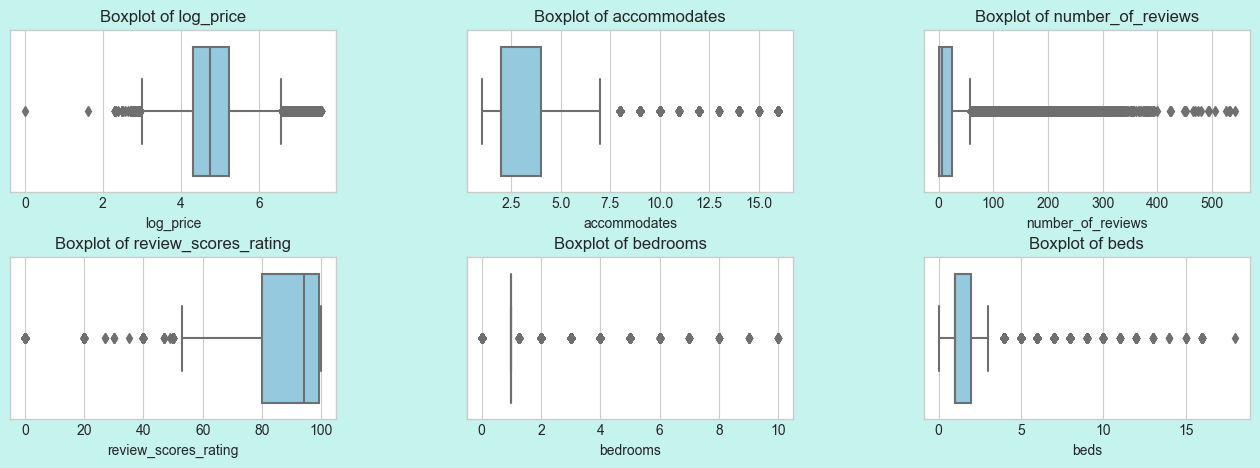

In [72]:
# Columns where we want to find outliers
outliers_columns = ['log_price', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']

fig = plt.figure(facecolor='#C5F3ED', figsize=(16, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Let's loop the columns and draw the boxplot
for num, column_name in enumerate(outliers_columns, start=1):
    ax = fig.add_subplot(3, 3, num)
    sns.boxplot(x=df[column_name], color='skyblue', ax=ax)
    ax.set_title(f"Boxplot of {column_name}")

plt.show()

In [73]:
# Let's set the lower and upper percentiles to handle outliers
lower_limit = 0.05
upper_limit = 0.95

outliers_columns = ['log_price', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']

def handle_outliers(df, column_name, lower_limit, upper_limit):
    column = df[column_name]
    Q1 = column.quantile(lower_limit)
    Q3 = column.quantile(upper_limit)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    df[column_name] = np.clip(df[column_name], lower_bound, upper_bound)

# Deal with outliers
for column_name in outliers_columns:
    handle_outliers(df, column_name, lower_limit, upper_limit)

# show the updated dataframe
#print(df)

accommodates

When we conducted an IQR analysis on the 'accommodates' column, we found 3604 outliers. However, upon examining them, we noticed a significant number of properties with the 'Loft' property type. We observed that rental properties of the 'Loft' type are typically spaces where there may not be bedrooms or beds but can accommodate a large number of people. Values like 8, 9, ... 16 should not be considered outliers in this case. We found that there are 110 values that are considered outliers, which have a bedroom count of 0 or 1, bed count less than 3, and property type other than 'Loft'. Upon inspecting their descriptions, we observed that they are not outliers. Therefore, we concluded that there are no outliers in the 'description' column.

bedrooms    &     beds

bathrooms

When we consider the number of 7.5, which is likely to be outliers in the number of bathrooms, and compare them with the types of houses, we see that these houses are villa type, and the ones with 8 bathrooms are hostels. We saw that in bathrooms with 0, there is information that the room type is shared room and there is no bathroom in the description section.



6. <a id = "11"></a><br>
# Visualization

<a id = "12"></a><br>
## Correlation of Numerical Columns

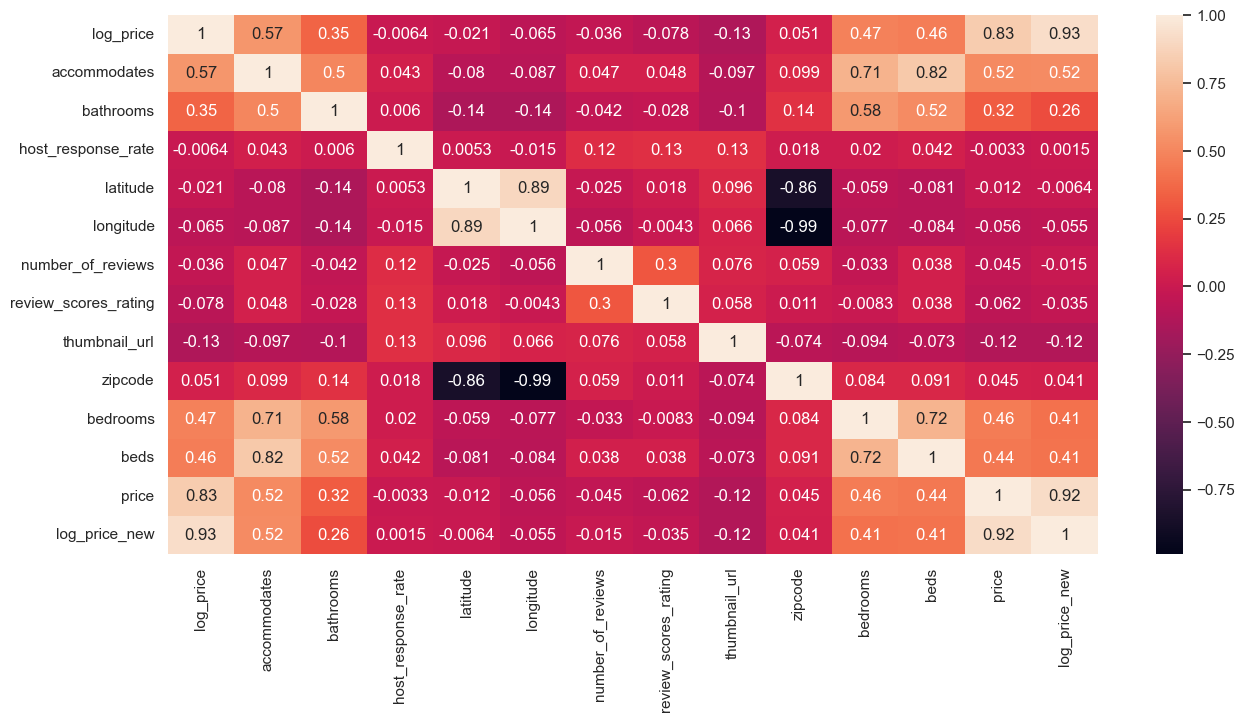

In [74]:
# Correlation of numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float'])
sns.set(font_scale=1.0)
plt.figure(figsize=(15,7))
sns.heatmap(numerical_columns.corr(), annot=True)
plt.show()

<a id = "13"></a><br>
## Accommodates -- Price

In [75]:

df[["accommodates", "price", "log_price"]].groupby(["accommodates"]).agg({'price': 'mean', 'log_price': 'mean'}).reset_index().sort_values(by="price", ascending=False)


accommodates       price  log_price
14            15  316.069972   5.969473
12            13  308.662618   5.877947
11            12  289.407705   6.108875
10            11  286.478195   5.825611
8              9  285.056872   5.704491
9             10  284.292853   5.861131
15            16  281.594309   6.097337
7              8  275.835610   5.737414
13            14  270.489208   6.069634
6              7  258.947818   5.540891
5              6  240.791686   5.456211
4              5  205.239287   5.266687
3              4  177.093265   5.069750
2              3  139.296725   4.816861
1              2  109.823295   4.562696
0              1   76.264221   4.190801

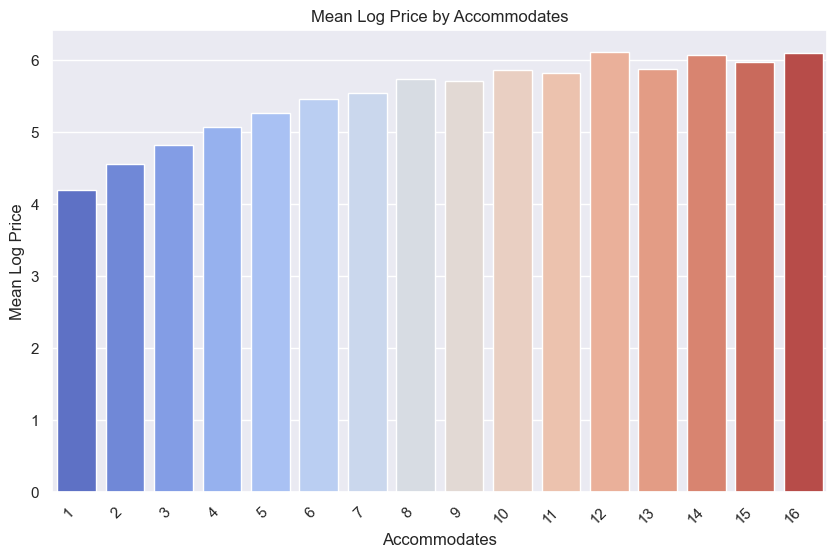

In [76]:
# Let's divide the "accommodates" column into categorical groups and calculate the "log_price" averages. 
# In this way, we can better see the effect on the price.

grouped_data = df.groupby('accommodates')['log_price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data, palette='coolwarm')
plt.xlabel('Accommodates')
plt.ylabel('Mean Log Price')
plt.title('Mean Log Price by Accommodates')
plt.xticks(rotation=45, ha='right')
plt.show()

<a id = "14"></a><br>
## Bathrooms -- Price

In [77]:
df[["bathrooms", "price", "log_price"]].groupby(["bathrooms"]).agg({'price': 'mean', 'log_price': 'mean'}).reset_index().sort_values(by="price", ascending=False)

bathrooms       price  log_price
7         3.5  303.030396   6.066175
14        7.0  269.653137   6.983412
6         3.0  266.217884   5.538145
9         4.5  262.358981   6.492479
5         2.5  255.014308   5.546589
8         4.0  241.285211   5.678826
10        5.0  231.454238   6.246404
12        6.0  227.221018   6.741813
4         2.0  211.421380   5.206550
11        5.5  208.434114   6.840940
15        7.5  160.370849   7.479765
3         1.5  148.025450   4.783934
13        6.5  140.121604   6.620326
2         1.0  126.528985   4.683862
1         0.5   93.558761   4.292816
0         0.0   81.151083   4.209571
16        8.0   72.458441   4.555600

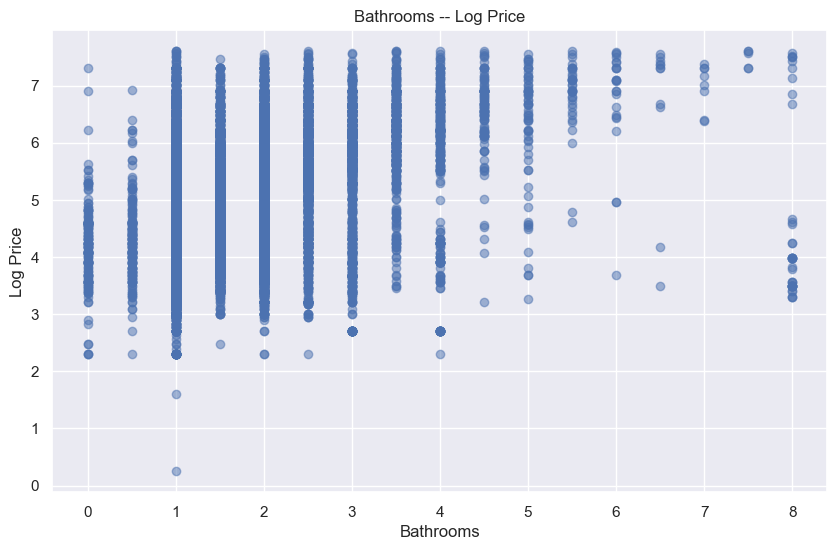

In [78]:
# Showing the relationship between "bathrooms" and "log_price"
plt.figure(figsize=(10, 6))
plt.scatter(df['bathrooms'], df['log_price'], alpha=0.5)
plt.xlabel('Bathrooms')
plt.ylabel('Log Price')
plt.title('Bathrooms -- Log Price')
plt.show()

<a id = "15"></a><br>
## Number of Reviews -- Price

In [79]:

df[["number_of_reviews", "price", "log_price"]].groupby(["number_of_reviews"]).agg({'price': 'mean', 'log_price': 'mean'}).reset_index().sort_values(by="price", ascending=False)


number_of_reviews       price  log_price
229                229  192.500000   5.245637
193                193  187.142857   5.150161
153                153  182.964286   4.990512
227                227  181.000000   5.164802
194                194  167.625000   5.047143
..                 ...         ...        ...
210                210   91.333333   4.275997
216                216   91.000000   4.468579
236                236   85.000000   4.440918
204                204   84.500000   4.412809
235                235   79.000000   4.369448

[241 rows x 3 columns]

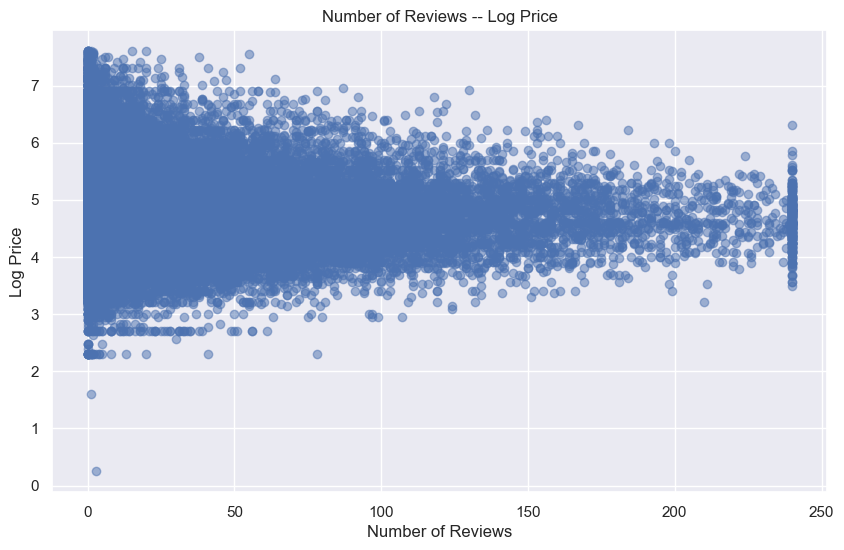

In [80]:
# Showing the relationship between "number_of_reviews" and "log_price"
plt.figure(figsize=(10, 6))
plt.scatter(df['number_of_reviews'], df['log_price'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Log Price')
plt.title('Number of Reviews -- Log Price')
plt.show()


<a id = "16"></a><br>
## Review Scores Rating -- Price

In [81]:

df[["review_scores_rating", "price", "log_price"]].groupby(["review_scores_rating"]).agg({'price': 'mean', 'log_price': 'mean'}).reset_index().sort_values(by="price", ascending=False)

review_scores_rating       price  log_price
12                  56.0  260.000000   5.560682
11                  55.0  185.000000   5.164980
0                    0.0  157.566079   4.918850
54                  99.0  149.740618   4.857946
55                 100.0  146.501961   4.811361
..                   ...         ...        ...
9                   53.0   75.375000   4.115040
13                  57.0   61.333333   4.077572
2                   27.0   40.500000   3.597969
7                   49.0   40.000000   3.688879
14                  58.0   29.000000   3.367296

[56 rows x 3 columns]

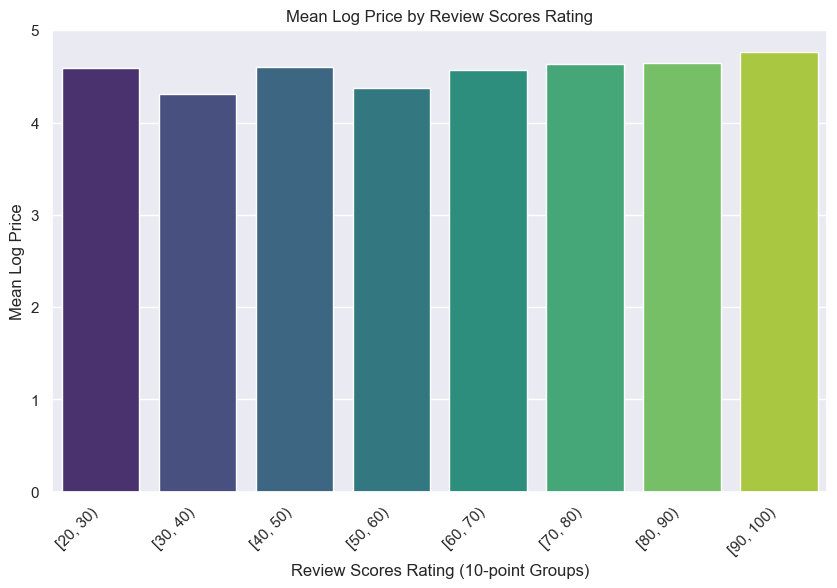

In [82]:
# Divide the "review_scores_rating" values into 10 groups.Showing the relationship between "review_scores_group" and "log_price"

df['review_scores_group'] = pd.cut(df['review_scores_rating'], bins=range(20, 110, 10), right=False)
grouped_data = df.groupby('review_scores_group')['log_price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index.astype(str), y=grouped_data, palette='viridis')
plt.xlabel('Review Scores Rating (10-point Groups)')
plt.ylabel('Mean Log Price')
plt.title('Mean Log Price by Review Scores Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

corr -0,035

<a id = "17"></a><br>
## Bedroom -- Price

In [83]:

df[["bedrooms", "price", "log_price"]].groupby(["bedrooms"]).agg({'price': 'mean', 'log_price': 'mean'}).reset_index().sort_values(by="price", ascending=False)

bedrooms       price  log_price
6  5.000000  308.778937   6.247682
5  4.000000  305.450141   5.999358
8  7.000000  286.619004   6.578558
9  7.500000  285.122853   6.462212
4  3.000000  274.265019   5.647582
7  6.000000  259.205092   6.524243
3  2.000000  210.253285   5.282020
0  0.000000  137.305182   4.823513
2  1.265793  135.477273   4.771037
1  1.000000  111.033532   4.551544

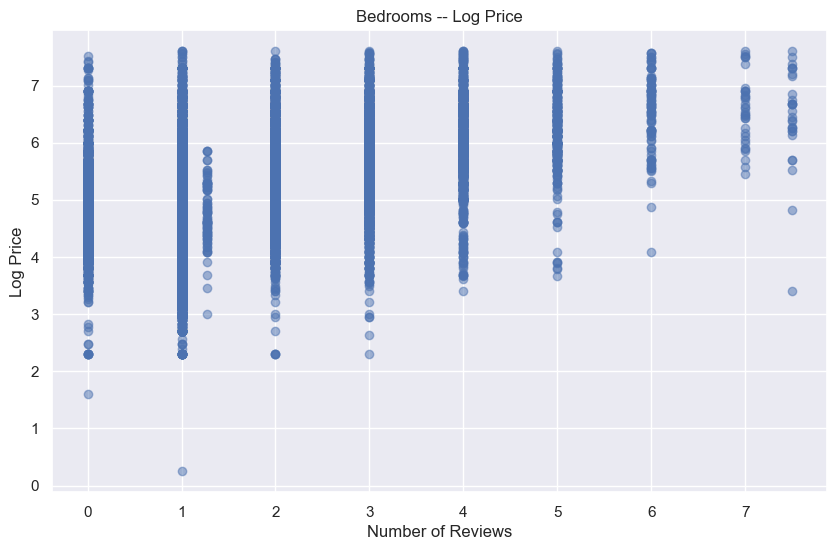

In [84]:
# Showing the relationship "bedrooms" and "log_price"
plt.figure(figsize=(10, 6))
plt.scatter(df['bedrooms'], df['log_price'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Log Price')
plt.title('Bedrooms -- Log Price')
plt.show()

<a id = "18"></a><br>
## Beds -- Price

In [85]:

df[["beds", "price", "log_price"]].groupby(["beds"]).agg({'price': 'mean', 'log_price': 'mean'}).reset_index().sort_values(by="price", ascending=False)

beds       price  log_price
8   7.000000  299.824584   5.920853
6   5.000000  278.038115   5.735934
7   6.000000  270.288874   5.706171
5   4.000000  246.305058   5.492790
9   8.000000  241.133622   5.345371
10  8.500000  237.652697   5.640097
4   3.000000  217.610122   5.324043
0   0.000000  169.666667   4.965341
3   2.000000  167.670200   4.999082
2   1.265793  111.607143   4.537935
1   1.000000  108.993376   4.539087

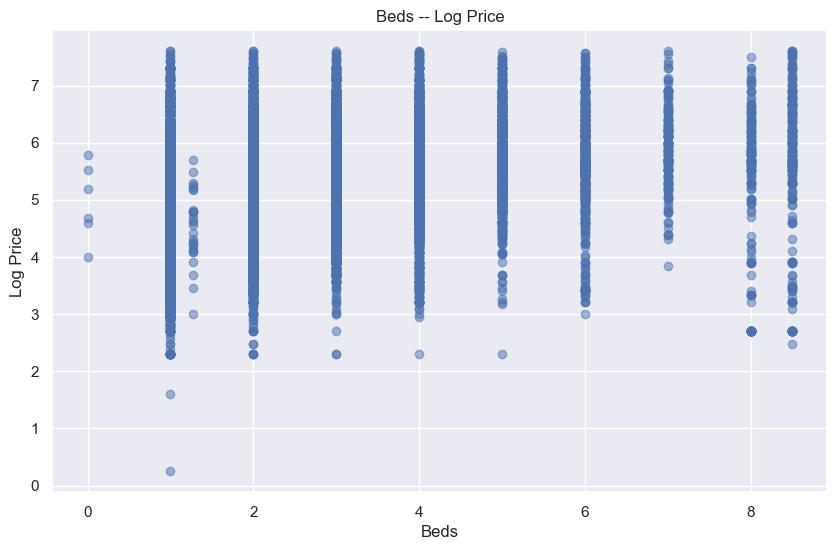

In [86]:
# Showing the relationship between "beds" and "log_price"
plt.figure(figsize=(10, 6))
plt.scatter(df['beds'], df['log_price'], alpha=0.5)
plt.xlabel('Beds')
plt.ylabel('Log Price')
plt.title('Beds -- Log Price')
plt.show()

7. <a id = "19"></a><br>
# Factorization of Categorical Columns

<a id = "20"></a><br>
## Propetty Type

In [87]:
top_10_property_types = df['property_type'].value_counts().head(10).index.tolist()

# # Mark other values as "Other"
df['property_type'] = df['property_type'].apply(lambda x: x if x in top_10_property_types else 'Other')

In [88]:
property_types = df['cancellation_policy'].value_counts().head(3).index.tolist()

# Merge super_strict_30 and super_strict_60 with strict
df['cancellation_policy'] = df['cancellation_policy'].apply(lambda x: x if x in property_types else 'strict')

<a id = "21"></a><br>
## Room Type - Bed Type  - City

In [89]:
# Columns to one-hot encode
columns_to_encode = ["room_type", "bed_type", "city",'property_type','cancellation_policy']

# Apply one-hot encoding using a for loop
for col in columns_to_encode:
    df = pd.get_dummies(df, columns=[col])

<a id = "22"></a><br>
## Cleaning Fee - Host Profile Pic. - Host Identity Verified - Instant Bookable  

In [90]:
df['cleaning_fee'] = df['cleaning_fee'].replace({False: 0, True: 1})
df['host_has_profile_pic'] = df['host_has_profile_pic'].replace({'t': 1, 'f': 0})
df['host_identity_verified'] = df['host_identity_verified'].replace({'t': 1, 't': 0})
df['instant_bookable'] = df['instant_bookable'].replace({'t': 1, 'f': 0})

8. <a id = "23"></a><br>
# Feature Engineering

<a id = "24"></a><br>
## Amenities

In [91]:
df['amenities'] = df['amenities'].map(lambda x: x.replace('"', '').replace('{', '').replace('}', '').split(','))

In [92]:
amenities = {x for xs in df['amenities'].tolist() for x in xs}
amenities.remove('')
amenities.remove('translation missing: en.hosting_amenity_49')
amenities.remove('translation missing: en.hosting_amenity_50')
amenities = list(amenities)

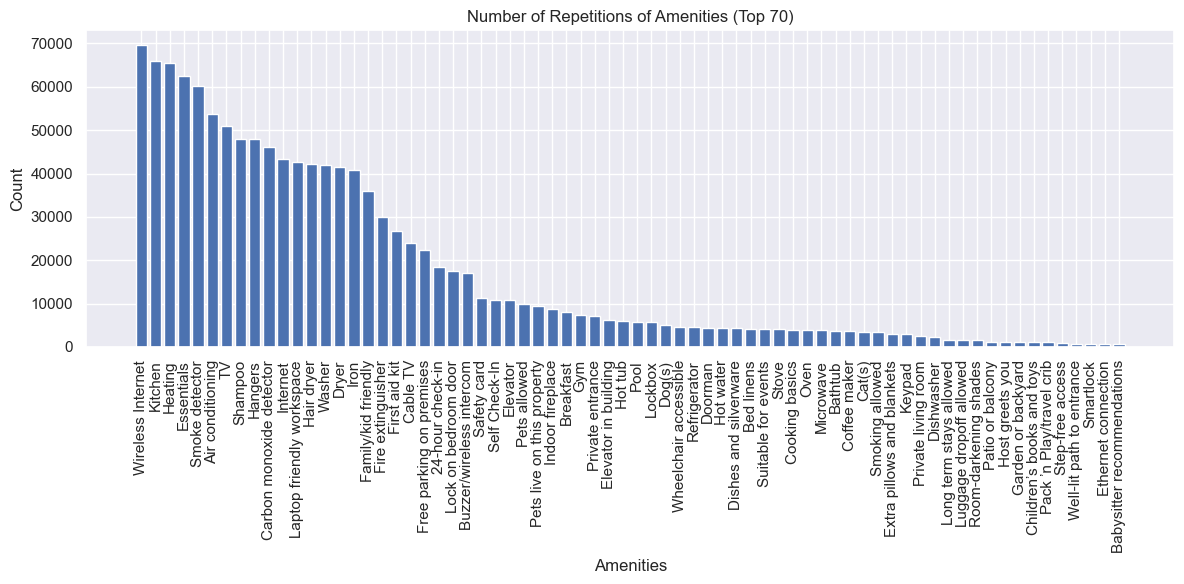

In [93]:
# Count how many times each feature is passed
amenities_count = {amenity: df['amenities'].apply(lambda x: amenity in x).sum() for amenity in amenities}

# Let's sort the amenities_count by value from most to least
amenities_count_sorted = dict(sorted(amenities_count.items(), key=lambda item: item[1], reverse=True))

# Let's create the x and y values for the chart (in order)
x = list(amenities_count_sorted.keys())[:70]
y = list(amenities_count_sorted.values())[:70]

# Graph creation
plt.figure(figsize=(12, 6))
plt.bar(x, y)
plt.xticks(rotation=90)  
plt.xlabel('Amenities')
plt.ylabel('Count')
plt.title('Number of Repetitions of Amenities (Top 70)')
plt.tight_layout()
plt.show()

In [94]:
#Converting the properties in the column into a table of 1 and 0 values.
amenities_df = pd.DataFrame(df['amenities'].apply(lambda x: [amenity in x for amenity in amenities]).tolist(), columns=amenities, index=df.index)
amenities_df = amenities_df.astype(int)
amenities_df

Game console  Family/kid friendly  Garden or backyard  \
0                 0                    1                   0   
1                 0                    1                   0   
2                 0                    1                   0   
3                 0                    0                   0   
4                 0                    0                   0   
...             ...                  ...                 ...   
74106             0                    0                   0   
74107             0                    1                   0   
74108             0                    1                   0   
74109             0                    0                   0   
74110             0                    1                   0   

       Suitable for events  Iron  Breakfast  Body soap  Bathtub  \
0                        0     1          0          0        0   
1                        0     1          0          0        0   
2                        0     1          1          0        0   
3                        0     0          0          0        0   
4                        0     0          0          0        0   
...                    ...   ...        ...        ...      ...   
74106                    0     0          0          0        0   
74107                    0     0          0          0        0   
74108                    0     1          0          0        0   
74109                    0     1          0          0        0   
74110                    0     0          0          0        0   

       Accessible-height bed  Handheld shower head  Pocket wifi  \
0                          0                     0            0   
1                          0                     0            0   
2                          0                     0            0   
3                          0                     0            0   
4                          0                     0            0   
...                      ...                   ...          ...   
74106                      0                     0            0   
74107                      0                     0            0   
74108                      0                     0            0   
74109                      0                     0            0   
74110                      0                     0            0   

       Step-free access  Microwave  Wheelchair accessible  Doorman  \
0                     0          0                      0        0   
1                     0          0                      0        0   
2                     0          0                      0        0   
3                     0          0                      0        0   
4                     0          0                      0        0   
...                 ...        ...                    ...      ...   
74106                 0          0                      0        0   
74107                 0          0                      0        0   
74108                 0          1                      0        0   
74109                 0          0                      0        0   
74110                 0          0                      0        0   

       Cooking basics  Room-darkening shades  Free parking on street  \
0                   0                      0                       0   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   0                      0                       0   
...               ...                    ...                     ...   
74106               0                      0                       0   
74107               0                      0                       0   
74108               1                      0                       0   
74109               0                      0                       

In [95]:
# Take the number of values of each column, count the ones with value count 1 and sort them
value_counts_1 = amenities_df.apply(lambda col: col.value_counts().get(1, 0)).sort_values(ascending=False)

# Let's keep the first 25 columns and drop the remaining columns.
# When we examine the graph, we think that after this value will not affect our analysis.
selected_columns = value_counts_1.index[:24]
amenities_df = amenities_df[selected_columns]

amenities_df

Wireless Internet  Kitchen  Heating  Essentials  Smoke detector  \
0                      1        1        1           1               0   
1                      1        1        1           1               1   
2                      1        1        1           1               1   
3                      1        1        1           1               1   
4                      1        1        1           1               1   
...                  ...      ...      ...         ...             ...   
74106                  0        0        0           0               0   
74107                  1        1        1           1               1   
74108                  1        1        1           1               1   
74109                  1        1        1           1               1   
74110                  1        1        1           1               1   

       Air conditioning  TV  Shampoo  Hangers  Carbon monoxide detector  \
0                     1   0        0        0                         0   
1                     1   0        1        1                         0   
2                     1   1        1        1                         1   
3                     0   1        0        0                         1   
4                     1   1        1        0                         1   
...                 ...  ..      ...      ...                       ...   
74106                 0   0        0        0                         0   
74107                 0   1        1        1                         0   
74108                 1   1        1        1                         1   
74109                 1   1        1        1                         1   
74110                 0   1        1        1                         1   

       Internet  Laptop friendly workspace  Hair dryer  Washer  Dryer  Iron  \
0             0                          0           1       0      0     1   
1             0                          0           1       1      1     1   
2             0                          1           1       0      0     1   
3             1                          0           0       1      1     0   
4             1                          0           0       0      0     0   
...         ...                        ...         ...     ...    ...   ...   
74106         0                          0           0       0      0     0   
74107         1                          0           1       1      1     0   
74108         1                          1           1       1      1     1   
74109         0                          1           1       1      1     1   
74110         1                          1           1       0      0     0   

       Family/kid friendly  Fire extinguisher  First aid kit  Cable TV  \
0                        1                  0              0         0   
1                        1                  1              0         0   
2                        1                  1              0         1   
3                        0                  1              1         1   
4                        0                  1              0         0   
...                    ...                ...            ...       ...   
74106                    0                  0              0         0   
74107                    1                  0              0         1   
74108                    1                  0              1         0   
74109                    0                  0              0         0   
74110                    1                  1              1         0   

       Free parking on premises  24-hour check-in  Lock on bedroom door  \
0                             0                 0                     0   
1                             0                 0                     0   
2                             0                 0                     0   
3                             0                 0                     0   
4   

In [96]:
df = pd.concat([df.drop(columns='amenities'), amenities_df], axis=1)
df.head()

log_price  accommodates  bathrooms  cleaning_fee  \
0   5.010635             3        1.0             1   
1   5.129899             7        1.0             1   
2   4.976734             5        1.0             1   
3   6.620073             4        1.0             1   
4   4.744932             2        1.0             1   

                                         description first_review  \
0  Beautiful, sunlit brownstone 1-bedroom in the ...   2016-06-18   
1  Enjoy travelling during your stay in Manhattan...   2017-08-05   
2  The Oasis comes complete with a full backyard ...   2017-04-30   
3  This light-filled home-away-from-home is super...   2017-02-28   
4  Cool, cozy, and comfortable studio located in ...   2015-05-12   

   host_has_profile_pic host_identity_verified  host_response_rate host_since  \
0                   1.0                      0            0.943841 2012-03-26   
1                   1.0                      f            1.000000 2017-06-19   
2                   1.0                      0            1.000000 2016-10-25   
3                   1.0                      0            0.943841 2015-04-19   
4                   1.0                      0            1.000000 2015-03-01   

   instant_bookable last_review   latitude   longitude  \
0                 0  2016-07-18  40.696524  -73.991617   
1                 1  2017-09-23  40.766115  -73.989040   
2                 1  2017-09-14  40.808110  -73.943756   
3                 0  2017-09-14  37.772004 -122.431619   
4                 1  2017-01-22  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

   number_of_reviews  review_scores_rating  thumbnail_url  zipcode  bedrooms  \
0                  2                 100.0              1  11201.0       1.0   
1                  6                  93.0              1  10019.0       3.0   
2                 10                  92.0              1  10027.0       1.0   
3                  0                   0.0              1  94117.0       2.0   
4                  4                  40.0              0  20009.0       0.0   

   beds       price  log_price_new Zipcode review_scores_group  \
0   1.0  150.000000       5.017280   11201                 NaN   
1   3.0  169.000000       5.135798   10019       [90.0, 100.0)   
2   3.0  145.000000       4.983607   10037       [90.0, 100.0)   
3   2.0  160.370849       5.083705   94115                 NaN   
4   1.0  115.000000       4.753590   20010        [40.0, 50.0)   

   room_type_Entire home/apt  room_type_Private room  room_type_Shared room  \
0                          1                       0                      0   
1                          1                       0                      0   
2                          1                       0                      0   
3                          1                       0                      0   
4                          1                       0                      0   

   bed_type_Airbed  bed_type_Couch  bed_type_Futon  bed_type_Pull-out Sofa  \
0                0               0               0                       0   
1                0               0               0                       0   
2                0               0               0                       0   
3                0               0               0                       0   
4                0               0               0                       0   

   bed_type_Real Bed  city_Boston  city_Chicago  city_DC  city_LA  city_NYC  \
0                  1            0             0        0        0         1   
1                  1            0             0   

Columns not to be feature engineered
beds - review_scores_rating - host_response_rate 

columns to drop
last_review - name

In [97]:
df.head()

log_price  accommodates  bathrooms  cleaning_fee  \
0   5.010635             3        1.0             1   
1   5.129899             7        1.0             1   
2   4.976734             5        1.0             1   
3   6.620073             4        1.0             1   
4   4.744932             2        1.0             1   

                                         description first_review  \
0  Beautiful, sunlit brownstone 1-bedroom in the ...   2016-06-18   
1  Enjoy travelling during your stay in Manhattan...   2017-08-05   
2  The Oasis comes complete with a full backyard ...   2017-04-30   
3  This light-filled home-away-from-home is super...   2017-02-28   
4  Cool, cozy, and comfortable studio located in ...   2015-05-12   

   host_has_profile_pic host_identity_verified  host_response_rate host_since  \
0                   1.0                      0            0.943841 2012-03-26   
1                   1.0                      f            1.000000 2017-06-19   
2                   1.0                      0            1.000000 2016-10-25   
3                   1.0                      0            0.943841 2015-04-19   
4                   1.0                      0            1.000000 2015-03-01   

   instant_bookable last_review   latitude   longitude  \
0                 0  2016-07-18  40.696524  -73.991617   
1                 1  2017-09-23  40.766115  -73.989040   
2                 1  2017-09-14  40.808110  -73.943756   
3                 0  2017-09-14  37.772004 -122.431619   
4                 1  2017-01-22  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

   number_of_reviews  review_scores_rating  thumbnail_url  zipcode  bedrooms  \
0                  2                 100.0              1  11201.0       1.0   
1                  6                  93.0              1  10019.0       3.0   
2                 10                  92.0              1  10027.0       1.0   
3                  0                   0.0              1  94117.0       2.0   
4                  4                  40.0              0  20009.0       0.0   

   beds       price  log_price_new Zipcode review_scores_group  \
0   1.0  150.000000       5.017280   11201                 NaN   
1   3.0  169.000000       5.135798   10019       [90.0, 100.0)   
2   3.0  145.000000       4.983607   10037       [90.0, 100.0)   
3   2.0  160.370849       5.083705   94115                 NaN   
4   1.0  115.000000       4.753590   20010        [40.0, 50.0)   

   room_type_Entire home/apt  room_type_Private room  room_type_Shared room  \
0                          1                       0                      0   
1                          1                       0                      0   
2                          1                       0                      0   
3                          1                       0                      0   
4                          1                       0                      0   

   bed_type_Airbed  bed_type_Couch  bed_type_Futon  bed_type_Pull-out Sofa  \
0                0               0               0                       0   
1                0               0               0                       0   
2                0               0               0                       0   
3                0               0               0                       0   
4                0               0               0                       0   

   bed_type_Real Bed  city_Boston  city_Chicago  city_DC  city_LA  city_NYC  \
0                  1            0             0        0        0         1   
1                  1            0             0   

<a id = "26"></a><br>
## Neighbourhood Level

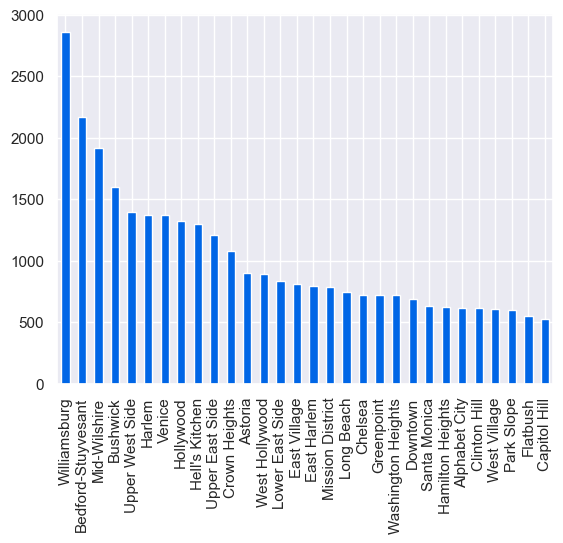

In [98]:
# Adding price per room field (For neighnourhood price level)
df['price_per_room'] = (df.log_price) / (df.bedrooms)

df.neighbourhood.value_counts().head(30).plot.bar(color=(.0, 0.4, 0.9, 1))

neighbourhood_avg_price = df[['neighbourhood','price_per_room']].groupby('neighbourhood')['price_per_room'].mean().sort_values()



In [99]:
neighbourhood_avg_price.replace(np.inf, np.nan,inplace=True)
neighbourhood_avg_price.fillna(neighbourhood_avg_price.mean(),inplace=True)

#print(neighbourhood_avg_price.sort_values(ascending=False))
#print('---------------------------------------')
print(neighbourhood_avg_price.describe())

count    630.000000
mean       3.626108
std        0.458991
min        1.035768
25%        3.626108
50%        3.626108
75%        3.626108
max        5.480639
Name: price_per_room, dtype: float64


In [100]:
neighbourhood_class_df = neighbourhood_avg_price.to_frame()
type(neighbourhood_class_df)

pandas.core.frame.DataFrame

In [101]:

# Converting neighbourhoods to Levels
def neigbourhood_class(row):
  if row['price_per_room'] >=0 and row['price_per_room'] <= 3.631428:
    return 1
  elif row['price_per_room'] > 3.631428 and row['price_per_room'] <= 3.868928:
    return 2
  elif row['price_per_room'] >3.868928 and row['price_per_room'] <= 4.194452: 
    return 3
  else:
    return 4
  
df['neighbourhood_level'] = df.apply(neigbourhood_class,axis=1)

In [102]:
df.sort_values(by='neighbourhood_level',ascending=True)

log_price  accommodates  bathrooms  cleaning_fee  \
60553   5.164786             7        2.0             1   
54317   3.555348             1        1.0             1   
34621   5.181784             6        1.0             1   
16472   6.907755            14        2.0             0   
16471   5.480639             4        1.0             1   
...          ...           ...        ...           ...   
31400   5.010635             2        1.0             0   
31401   4.499810             2        1.0             0   
31402   5.560682             4        1.0             0   
31387   5.062595             2        1.0             1   
74110   4.852030             4        1.0             0   

                                             description first_review  \
60553  This 3 bedrooms’ luxury condo, hardwood floors...   2017-02-07   
54317  Perfect crash pad over the holiday period.  Ap...   2015-11-06   
34621  My place is close to Brooklyn Bridge, Manhatta...   2016-10-10   
16472  Great location two blocks from the Woodley Par...   2018-09-05   
16471  Two bedrooms one bathroom and a big backyard a...   2018-06-15   
...                                                  ...          ...   
31400  Prime area in West Hollywood, walking distance...   2017-01-04   
31401  Studio basement apartment with its own exit, f...   2018-12-19   
31402  We just bought our first home & would like to ...   2015-09-07   
31387  1 bedroom apt with skylight in the heart of Wi...   2014-07-20   
74110  You will stay-aboard the Island Trader at one ...   2013-09-05   

       host_has_profile_pic host_identity_verified  host_response_rate  \
60553                   1.0                      f            1.000000   
54317                   1.0                      0            0.943841   
34621                   1.0                      f            0.943841   
16472                   1.0                      f            0.943841   
16471                   1.0                      f            1.000000   
...                     ...                    ...                 ...   
31400                   1.0                      f            0.943841   
31401                   1.0                      0            1.000000   
31402                   1.0                      f            1.000000   
31387                   1.0                      0            1.000000   
74110                   1.0                      0            1.000000   

      host_since  instant_bookable last_review   latitude   longitude  \
60553 2016-12-19                 1  2017-09-25  40.700778  -73.926711   
54317 2014-03-09                 0  2017-04-29  40.713000  -73.941093   
34621 2013-01-17                 0  2016-10-10  40.697521  -73.983230   
16472 2017-01-08                 0  2016-10-23  38.925372  -77.050794   
16471 2016-10-16                 1  2016-10-23  40.616640  -74.084853   
...          ...               ...         ...        ...         ...   
31400 2015-07-30                 0  2017-04-08  34.080336 -118.372554   
31401 2017-04-23                 0  2017-04-08  38.919053  -76.981143   
31402 2014-04-01                 0  2017-04-08  33.956180 -118.437659   
31387 2014-06-19                 0  2017-07-24  40.716262  -73.957954   
74110 2012-11-26                 0  2017-04-30  33.761096 -118.192409   

                                                    name  \
60553   3-bedrooms Spacious Private Apt private backyard   
54317                   Williamsburg - Terrace apartment   
34621            DUMBO/DOWNTOWN BROOKLYN SPACIOUS DUPLEX   
16472  5BR/2BA house great for Inauguration/Women's M...   
16471                   Beautiful house in Staten Island   
...                                                  ...   
31400                                          Zara Shen   
31401  Brand new basement apt. 10 mins from downtown DC.   
31402                Playa del Rey condo 6 blcks 2 beach   
31387                Sunny, spacious, 1BR in Willamsbur

In [103]:
df.drop('price_per_room',axis=1,inplace=True)

In [104]:
df.head()

log_price  accommodates  bathrooms  cleaning_fee  \
0   5.010635             3        1.0             1   
1   5.129899             7        1.0             1   
2   4.976734             5        1.0             1   
3   6.620073             4        1.0             1   
4   4.744932             2        1.0             1   

                                         description first_review  \
0  Beautiful, sunlit brownstone 1-bedroom in the ...   2016-06-18   
1  Enjoy travelling during your stay in Manhattan...   2017-08-05   
2  The Oasis comes complete with a full backyard ...   2017-04-30   
3  This light-filled home-away-from-home is super...   2017-02-28   
4  Cool, cozy, and comfortable studio located in ...   2015-05-12   

   host_has_profile_pic host_identity_verified  host_response_rate host_since  \
0                   1.0                      0            0.943841 2012-03-26   
1                   1.0                      f            1.000000 2017-06-19   
2                   1.0                      0            1.000000 2016-10-25   
3                   1.0                      0            0.943841 2015-04-19   
4                   1.0                      0            1.000000 2015-03-01   

   instant_bookable last_review   latitude   longitude  \
0                 0  2016-07-18  40.696524  -73.991617   
1                 1  2017-09-23  40.766115  -73.989040   
2                 1  2017-09-14  40.808110  -73.943756   
3                 0  2017-09-14  37.772004 -122.431619   
4                 1  2017-01-22  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

   number_of_reviews  review_scores_rating  thumbnail_url  zipcode  bedrooms  \
0                  2                 100.0              1  11201.0       1.0   
1                  6                  93.0              1  10019.0       3.0   
2                 10                  92.0              1  10027.0       1.0   
3                  0                   0.0              1  94117.0       2.0   
4                  4                  40.0              0  20009.0       0.0   

   beds       price  log_price_new Zipcode review_scores_group  \
0   1.0  150.000000       5.017280   11201                 NaN   
1   3.0  169.000000       5.135798   10019       [90.0, 100.0)   
2   3.0  145.000000       4.983607   10037       [90.0, 100.0)   
3   2.0  160.370849       5.083705   94115                 NaN   
4   1.0  115.000000       4.753590   20010        [40.0, 50.0)   

   room_type_Entire home/apt  room_type_Private room  room_type_Shared room  \
0                          1                       0                      0   
1                          1                       0                      0   
2                          1                       0                      0   
3                          1                       0                      0   
4                          1                       0                      0   

   bed_type_Airbed  bed_type_Couch  bed_type_Futon  bed_type_Pull-out Sofa  \
0                0               0               0                       0   
1                0               0               0                       0   
2                0               0               0                       0   
3                0               0               0                       0   
4                0               0               0                       0   

   bed_type_Real Bed  city_Boston  city_Chicago  city_DC  city_LA  city_NYC  \
0                  1            0             0        0        0         1   
1                  1            0             0   

In [105]:

# Step 1: Sorting neighbourhood values using value_counts()
neighbourhood_counts = df['neighbourhood'].value_counts().sort_values(ascending=False)

# Step 2: Calculating the minimum, maximum, and mean values of log_price for each neighbourhood
neighbourhood_stats = df.groupby('neighbourhood')['log_price'].agg(['min', 'max', 'mean'])

In [106]:
neighbourhood_stats_sorted = neighbourhood_stats.loc[neighbourhood_counts.index]
print(neighbourhood_stats_sorted)

                         min       max      mean
Williamsburg        3.178054  7.313220  4.740027
Bedford-Stuyvesant  2.302585  7.207860  4.423185
Mid-Wilshire        2.302585  7.595890  4.671863
Bushwick            2.302585  6.907755  4.274465
Upper West Side     1.609438  7.313220  5.001347
...                      ...       ...       ...
New Dorp Beach      4.127134  4.127134  4.127134
Arboretum           4.234107  4.234107  4.234107
La Habra            4.317488  4.317488  4.317488
Printers Row        5.075174  5.075174  5.075174
Grant City          4.382027  4.382027  4.382027

[630 rows x 3 columns]


* Edit feature name

In [107]:
df.rename(columns={'property_type_Bed & Breakfast': 'property_type_bed_break'}, inplace=True)
df.rename(columns={'room_type_Entire home/apt': 'room_type_entire_home'}, inplace=True)
df.rename(columns={'room_type_Private room': 'room_type_private_room'}, inplace=True)
df.rename(columns={'room_type_Shared room': 'room_type_shared_room'}, inplace=True)
df.rename(columns={'bed_type_Real Bed': 'bed_type_real_Bed'}, inplace=True)
df.rename(columns={'Wireless Internet': 'wireless_internet'}, inplace=True)
df.rename(columns={'Smoke detector': 'smoke_detector'}, inplace=True)
df.rename(columns={'Air conditioning': 'air_conditioning'}, inplace=True)
df.rename(columns={'Carbon monoxide detector': 'carbon_monoxide_detector'}, inplace=True)
df.rename(columns={'Laptop friendly workspace': 'laptop_friendly_workspace'}, inplace=True)
df.rename(columns={'Hair dryer': 'hair_dryer'}, inplace=True)
df.rename(columns={'Family/kid friendly': 'family_kid_friendly'}, inplace=True)
df.rename(columns={'Fire extinguisher': 'fire_extinguister'}, inplace=True)
df.rename(columns={'First aid kit': 'first_aid_kit'}, inplace=True)
df.rename(columns={'Cable TV': 'cable_tv'}, inplace=True)
df.rename(columns={'Free parking on premises': 'free_parking_on_premises'}, inplace=True)
df.rename(columns={'24-hour check-in': 'alltime_check_in'}, inplace=True)
df.rename(columns={'Lock on bedroom door': 'lock_on_bedroom_door'}, inplace=True)
df.rename(columns={'Buzzer/wireless intercom': 'buzzer_wireless,intercom'}, inplace=True)
df.rename(columns={'bed_type_Pull-out Sofa': 'bed_type_Pull_out_Sofa'}, inplace=True)



In [108]:
def true_false_to_binary(val):
    if val == True:
        return 1
    elif val == False:
        return 0
    else:
        return val  # If val is not "True" or "False", return value as is

# Make "True" and "False" values 1 and 0 by applying the function to the corresponding columns of the data frame
binary_cols = ['property_type_Apartment','property_type_bed_break','property_type_Bungalow','property_type_Condominium','property_type_Dorm','property_type_Guesthouse','property_type_House','property_type_Loft','property_type_Other','property_type_Townhouse','cancellation_policy_flexible','cancellation_policy_moderate','cancellation_policy_strict','room_type_entire_home','room_type_private_room','room_type_shared_room','bed_type_Airbed','bed_type_Couch','bed_type_Futon','bed_type_Pull_out_Sofa','bed_type_real_Bed','city_Boston','city_Chicago','city_DC','city_LA','city_NYC','city_SF']
df[binary_cols] = df[binary_cols].applymap(true_false_to_binary)




In [109]:
columns_to_drop = ['host_has_profile_pic','host_identity_verified','latitude','longitude', 'name','price','last_review','first_review',"review_scores_group",'description','neighbourhood','zipcode','Zipcode','host_since']
df = df.drop(columns=columns_to_drop)


In [110]:
df.head()

log_price  accommodates  bathrooms  cleaning_fee  host_response_rate  \
0   5.010635             3        1.0             1            0.943841   
1   5.129899             7        1.0             1            1.000000   
2   4.976734             5        1.0             1            1.000000   
3   6.620073             4        1.0             1            0.943841   
4   4.744932             2        1.0             1            1.000000   

   instant_bookable  number_of_reviews  review_scores_rating  thumbnail_url  \
0                 0                  2                 100.0              1   
1                 1                  6                  93.0              1   
2                 1                 10                  92.0              1   
3                 0                  0                   0.0              1   
4                 1                  4                  40.0              0   

   bedrooms  beds  log_price_new  room_type_entire_home  \
0       1.0   1.0       5.017280                      1   
1       3.0   3.0       5.135798                      1   
2       1.0   3.0       4.983607                      1   
3       2.0   2.0       5.083705                      1   
4       0.0   1.0       4.753590                      1   

   room_type_private_room  room_type_shared_room  bed_type_Airbed  \
0                       0                      0                0   
1                       0                      0                0   
2                       0                      0                0   
3                       0                      0                0   
4                       0                      0                0   

   bed_type_Couch  bed_type_Futon  bed_type_Pull_out_Sofa  bed_type_real_Bed  \
0               0               0                       0                  1   
1               0               0                       0                  1   
2               0               0                       0                  1   
3               0               0                       0                  1   
4               0               0                       0                  1   

   city_Boston  city_Chicago  city_DC  city_LA  city_NYC  city_SF  \
0            0             0        0        0         1        0   
1            0             0        0        0         1        0   
2            0             0        0        0         1        0   
3            0             0        0        0         0        1   
4            0             0        1        0         0        0   

   property_type_Apartment  property_type_bed_break  property_type_Bungalow  \
0                        1                        0                       0   
1                        1                        0                       0   
2                        1                        0                       0   
3                        0                        0                       0   
4                        1                        0                       0   

   property_type_Condominium  property_type_Dorm  property_type_Guesthouse  \
0                          0                   0                         0   
1                          0                   0                         0   
2                          0                   0                         0   
3                          0                   0                         0   
4                          0                   0                         0   

   property_type_House  property_type_Loft  property_type_Other  \
0                    0                   0                    0   
1                    0                   0                    0   
2                    0                   0                    0   
3                    1                   0                    0   
4                    0                   0                    0   

   property_type_Townhouse  cancellation_policy_flexible  \
0   

In [111]:
df.to_csv('data_final.csv', index=False)

# Feature Selection

# RFE 

In [112]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Split data 
X = df.drop(columns=['log_price','log_price_new'])  # "target" 
y = df['log_price']

# select feature and feature count with RFE 
model = LinearRegression()
rfe = RFE(model, n_features_to_select=35)  
X_rfe = rfe.fit_transform(X, y)

# Show Feature index 
selected_features = pd.DataFrame({'Feature': X.columns, 'Selected': rfe.support_, 'Ranking': rfe.ranking_})
print(selected_features[selected_features['Selected'] == True])

                         Feature  Selected  Ranking
1                      bathrooms      True        1
3             host_response_rate      True        1
8                       bedrooms      True        1
10         room_type_entire_home      True        1
11        room_type_private_room      True        1
12         room_type_shared_room      True        1
13               bed_type_Airbed      True        1
14                bed_type_Couch      True        1
15                bed_type_Futon      True        1
16        bed_type_Pull_out_Sofa      True        1
17             bed_type_real_Bed      True        1
18                   city_Boston      True        1
19                  city_Chicago      True        1
20                       city_DC      True        1
21                       city_LA      True        1
22                      city_NYC      True        1
23                       city_SF      True        1
24       property_type_Apartment      True        1
25       pro

8. <a id = "27"></a><br>
# Modeling

<a id = "28"></a><br>
## Load Final Data

In [113]:
df_final = pd.read_csv("data_final.csv")

<a id = "29"></a><br>
## Split Data

In [114]:

X = df_final.drop(['log_price_new','log_price'], axis=1)
y = df_final['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 48349
X_test 23814
y_train 48349
y_test 23814


Notation:

N: Number of data points
y_i: True values (observed values of data points)
ŷ_i: Predicted values (model's predicted values)
Error Metrics:

Mean Absolute Error (MAE):
Formula: MAE = (1/N) * Σ|y_i - ŷ_i|
Description: Measures the average absolute difference between the true values and the predicted values.

Mean Squared Error (MSE):
Formula: MSE = (1/N) * Σ(y_i - ŷ_i)^2
Description: Measures the average squared difference between the true values and the predicted values.

Root Mean Squared Error (RMSE):
Formula: RMSE = √(MSE)
Description: Square root of MSE, measures the square root of the average squared difference between the true values and the predicted values.

R-squared (R^2) Score:
Formula: R^2 = 1 - (Σ(y_i - ŷ_i)^2) / (Σ(y_i - ȳ)^2)
Description: Measures the proportion of the variance in the true values explained by the variance in the predicted values.

<a id = "30"></a><br>
## Linear Regressor

In [115]:

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_lr = metrics.r2_score(y_test, y_pred_lr)



print('mean Squarred Error of Linear Regression     : ', mse_lr)
print('R2 Score of Linear Regression                : ', r2_lr)

mean Squarred Error of Linear Regression     :  0.19463490659808422
R2 Score of Linear Regression                :  0.6154748217438285


<a id = "31"></a><br>
## Random Forest Regressor

In [116]:
rf = RandomForestRegressor()

rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_rf = metrics.r2_score(y_test, y_pred_rf)



print('Mean Squarred Error of Random Forest Regressor     : ', mse_rf)
print('R2 Score of Random Forest Regressor                : ', r2_rf)

Mean Squarred Error of Random Forest Regressor     :  0.1399601039899354
R2 Score of Random Forest Regressor                :  0.723491613728799


<a id = "32"></a><br>
## Cat Boost Regressor

In [117]:
model_CBR = CatBoostRegressor(verbose = 0)

model_CBR.fit(X_train, y_train)

cross_val_score(model_CBR, X_train, y_train,
                           scoring='r2',
                           cv=KFold(n_splits=5,
                                    shuffle=True,
                                    random_state=2022,
                                    ))

y_pred_cbr = model_CBR.predict(X_test)

mae_cbr  = metrics.mean_absolute_error(y_test, y_pred_cbr)
mse_cbr  = metrics.mean_squared_error(y_test, y_pred_cbr)
rmse_cbr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cbr))
r2_cbr   = metrics.r2_score(y_test, y_pred_cbr)


print('Mean Squarred Error of CatBoost Regressor     : ', mse_cbr)
print('R2 Score of CatBoost Regressor                : ', r2_cbr)

Mean Squarred Error of CatBoost Regressor     :  0.12891799347800192
R2 Score of CatBoost Regressor                :  0.7453066601001745


<a id = "33"></a><br>
## Gradient Boosting Regressor

In [118]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

mae_gb  = metrics.mean_absolute_error(y_test, y_pred_gb)
mse_gb  = metrics.mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb))
r2_gb   = metrics.r2_score(y_test, y_pred_gb)

print('Mean Squarred Error of Gradient Boosting     : ', mse_gb)
print('R2 Score of Gradient Boosting                : ', r2_gb)

Mean Squarred Error of Gradient Boosting     :  0.14592698984213762
R2 Score of Gradient Boosting                :  0.7117032974084885


<a id = "34"></a><br>
## XGB Regressor

In [119]:
xgb = XGBRegressor(objective='reg:squarederror')

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

mae_xgb  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_xgb   = metrics.r2_score(y_test, y_pred_xgb)


print('Mean Squarred Error of XGBoost Regressor     : ', mse_xgb)
print('R2 Score of XGBoost Regressor                : ', r2_xgb)

Mean Squarred Error of XGBoost Regressor     :  0.1333651843565751
R2 Score of XGBoost Regressor                :  0.7365206879679824


# DecissionTrees

In [120]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Decision Tree modelini oluşturun ve eğitin
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)


y_pred_tree = tree.predict(X_test)

# Evaluating model performance
mae_tree  = metrics.mean_absolute_error(y_test, y_pred_tree)
mse_tree  = metrics.mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree))
r2_tree   = metrics.r2_score(y_test, y_pred_tree)


print('\nMean Squarred Error of DecissionTrees      : ', mse_tree)
print('\nR2 Score of DecissionTrees                : ', r2_tree)


Mean Squarred Error of DecissionTrees      :  0.28452196211593206

R2 Score of DecissionTrees                :  0.4378918966146983


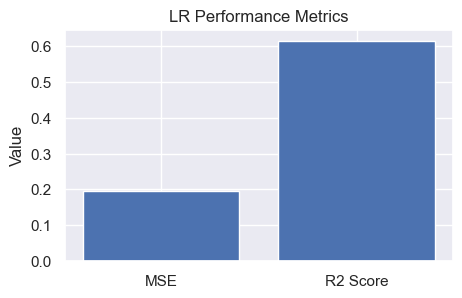

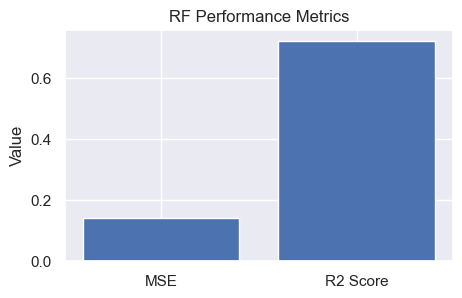

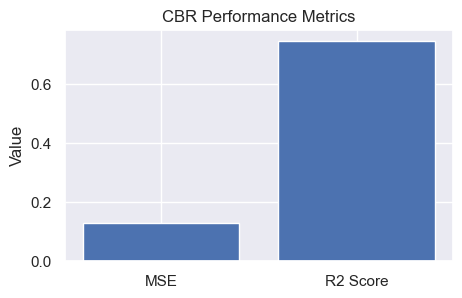

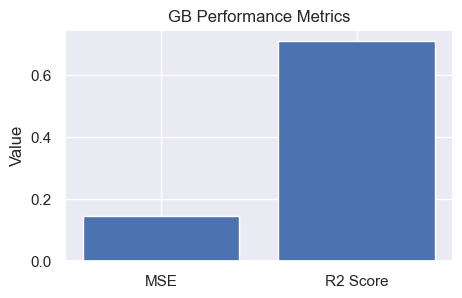

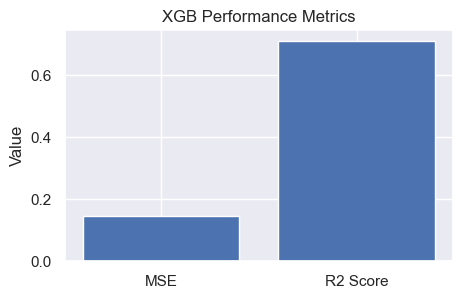

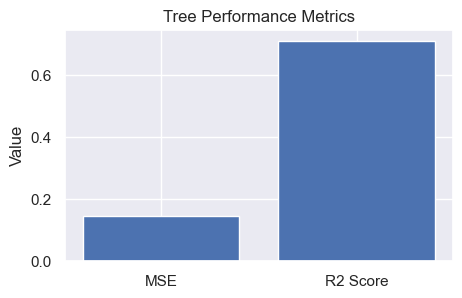

In [121]:
def draw_metrics_bar_chart(metrics_dict, title):
    plt.figure(figsize=(5, 3))
    plt.bar(metrics_dict.keys(), metrics_dict.values())
    plt.ylabel('Value')
    plt.title(title)
    plt.show()

# Dört modelin metriklerini içeren sözlükleri tanımlayalım (örnek veriler)
lr_metrics = {
    'MSE': mse_lr ,
    'R2 Score': r2_lr
}

rf_metrics = {
    'MSE': mse_rf ,
    'R2 Score': r2_rf
}

cbr_metrics = {
    'MSE':  mse_cbr ,
    'R2 Score': r2_cbr
}

gb_metrics = {
    'MSE':  mse_gb ,
    'R2 Score': r2_gb
}

xgb_metrics = {
    'MSE':  mse_xgb ,
    'R2 Score': r2_xgb
}

tree_metrics = {
    'MSE':  mse_tree ,
    'R2 Score': r2_tree
}

# Her model için grafikleri çizdiriyoruz
draw_metrics_bar_chart(lr_metrics, 'LR Performance Metrics')
draw_metrics_bar_chart(rf_metrics, 'RF Performance Metrics')
draw_metrics_bar_chart(cbr_metrics, 'CBR Performance Metrics')
draw_metrics_bar_chart(gb_metrics, 'GB Performance Metrics')
draw_metrics_bar_chart(gb_metrics, 'XGB Performance Metrics')
draw_metrics_bar_chart(gb_metrics, 'Tree Performance Metrics')

<a id = "35"></a><br>
## Model Comparision

In [122]:
r2_list = {"Linear Regression": r2_lr,
          "Random Forest": r2_rf ,        
          "CatBoost": r2_cbr,
          "Gradient Boosting":r2_gb ,
          "XGBoost": r2_xgb,
          "Decission Tree":r2_tree}

mae_list = {"Linear Regression": mae_lr,
          "Random Forest": mae_rf ,
          "CatBoost": mae_cbr,
          "Gradient Boosting":mae_gb ,
          "XGBoost": mae_xgb,
          "Decission Tree":mae_tree}

mse_list = {"Linear Regression": mse_lr,
          "Random Forest": mse_rf ,
          "CatBoost": mse_cbr,
          "Gradient Boosting":mse_gb ,
          "XGBoost": mse_xgb,
          "Decission Tree":mse_tree}

rmse_list = {"Linear Regression": rmse_lr,
          "Random Forest": rmse_rf ,
          "CatBoost": rmse_cbr,
          "Gradient Boosting":rmse_gb ,
          "XGBoost": rmse_xgb,
          "Decission Tree":rmse_tree}

In [123]:
a1 =  pd.DataFrame.from_dict(r2_list, orient = 'index', columns = ["R2 SCORE"])
a2 =  pd.DataFrame.from_dict(mae_list, orient = 'index', columns = ["MEAN ABSOLUTE ERROR"])
a3 =  pd.DataFrame.from_dict(mse_list, orient = 'index', columns = ["MEAN SQUARRED ERROR"])
a4 =  pd.DataFrame.from_dict(rmse_list, orient = 'index', columns = ["ROOT MEAN SQUARRED ERROR"])
org= pd.concat([a1, a2, a3, a4], axis = 1)

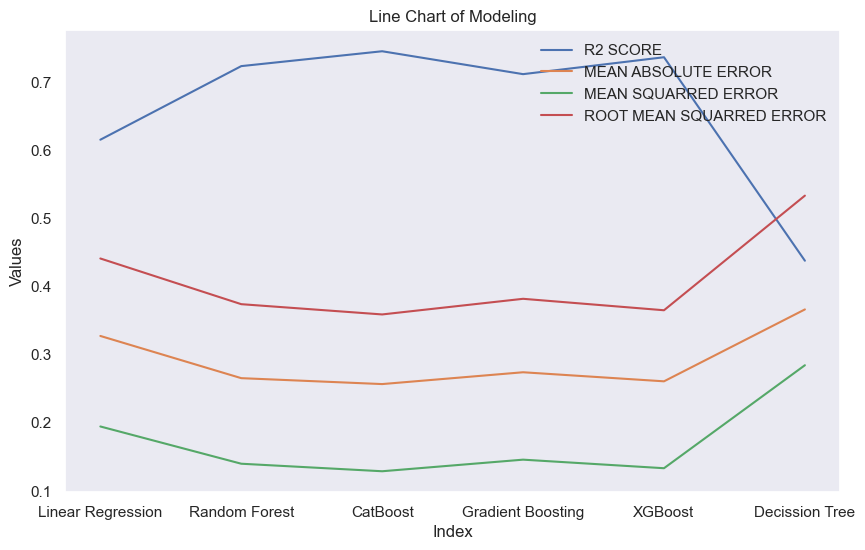

In [124]:
#Graphic
plt.figure(figsize=(10, 6))
for col in org.columns:
    plt.plot(org[col], label=col)

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Chart of Modeling')
plt.legend()
plt.grid()
plt.show()

# Price Comparision 

In [125]:
price_compare_lr = pd.DataFrame({"lr_real_y": np.exp(y[0:10]),
                    "lr_predict_y": np.exp(lr.predict(X)[0:10])})

price_compare_rf = pd.DataFrame({"rf_real_y": np.exp(y[0:10]),
                    "rf_predict_y": np.exp(rf.predict(X)[0:10])})

price_compare_gb = pd.DataFrame({"gb_real_y": np.exp(y[0:10]),
                    "gb_predict_y": np.exp(gb.predict(X)[0:10])})

price_compare_xgb = pd.DataFrame({"xgb_real_y": np.exp(y[0:10]),
                    "xgb_predict_y": np.exp(xgb.predict(X)[0:10])})

price_compare_tree = pd.DataFrame({"tree_real_y": np.exp(y[0:10]),
                    "tree_predict_y": np.exp(tree.predict(X)[0:10])})

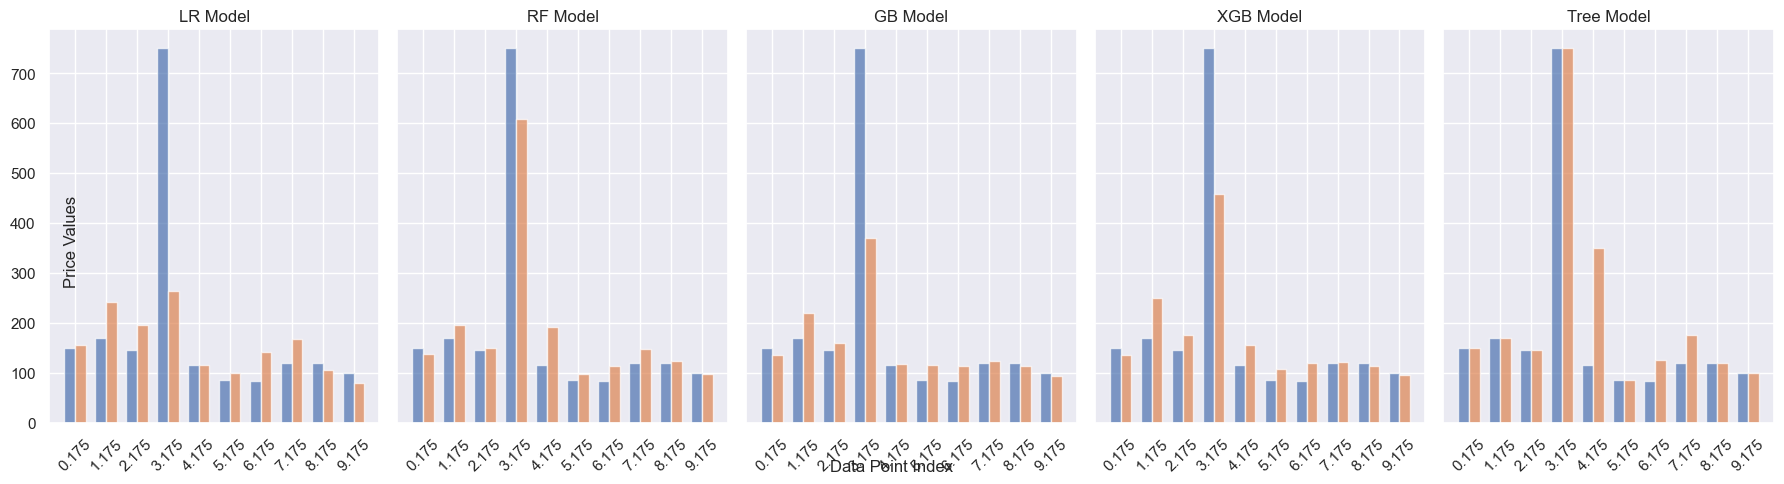

In [126]:
index = np.arange(len(price_compare_lr))

fig, axs = plt.subplots(1, 5, figsize=(18, 5), sharey=True)
width = 0.35
# 1.  (LR)
axs[0].bar(index, price_compare_lr['lr_real_y'], width, label='Trur Value', alpha=0.7)
axs[0].bar(index + width, price_compare_lr['lr_predict_y'], width, label='Predict ', alpha=0.7)
axs[0].set_title('LR Model')
axs[0].set_xticks(index + width / 2)  # X ekseni etiketlerini ortalamak için
axs[0].tick_params(axis='x', rotation=45)

# 2.(RF)
axs[1].bar(index, price_compare_rf['rf_real_y'], width, label='True', alpha=0.7)
axs[1].bar(index + width, price_compare_rf['rf_predict_y'], width, label='Predict', alpha=0.7)
axs[1].set_title('RF Model')
axs[1].set_xticks(index + width / 2)  # X ekseni etiketlerini ortalamak için
axs[1].tick_params(axis='x', rotation=45)

# 3.(GB)
axs[2].bar(index, price_compare_gb['gb_real_y'], width, label='True', alpha=0.7)
axs[2].bar(index + width, price_compare_gb['gb_predict_y'], width, label='Predict', alpha=0.7)
axs[2].set_title('GB Model')
axs[2].set_xticks(index + width / 2)  # X ekseni etiketlerini ortalamak için
axs[2].tick_params(axis='x', rotation=45)

# 4.(XGB)
axs[3].bar(index, price_compare_xgb['xgb_real_y'], width, label='True', alpha=0.7)
axs[3].bar(index + width, price_compare_xgb['xgb_predict_y'], width, label='Predict', alpha=0.7)
axs[3].set_title('XGB Model')
axs[3].set_xticks(index + width / 2)  # X ekseni etiketlerini ortalamak için
axs[3].tick_params(axis='x', rotation=45)

# 5.(Tree)
axs[4].bar(index, price_compare_tree['tree_real_y'], width, label='True', alpha=0.7)
axs[4].bar(index + width, price_compare_tree['tree_predict_y'], width, label='Predict', alpha=0.7)
axs[4].set_title('Tree Model')
axs[4].set_xticks(index + width / 2)  # X ekseni etiketlerini ortalamak için
axs[4].tick_params(axis='x', rotation=45)

# Ortak y eksen etiketini ayarlayalım
fig.text(0.5, 0.04, 'Data Point Index', ha='center')
fig.text(0.04, 0.5, 'Price Values', va='center', rotation='vertical')

# Eksenlerin ve grafiğin görsel düzenlemelerini yapalım
plt.tight_layout()

# Grafiği gösterelim
plt.show()

* Find best parameters for XGBoost Model

In [128]:
# Creating the XGBoost classifier model
""" gb_model = XGBRegressor()

param_grid = {
        'learning_rate': [0.01,0.05, 0.1],
        'max_depth': [3,5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.3,0.5, 0.9],
        'colsample_bytree': [0.5, 0.8, 0.9],
        'n_estimators' : [100, 200, 600]
        } 

# Step to find the best parameters with Grid Search and cross validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Best params
best_params = grid_search.best_params_
print("Best params:", best_params) """

' gb_model = XGBRegressor()\n\nparam_grid = {\n        \'learning_rate\': [0.01,0.05, 0.1],\n        \'max_depth\': [3,5, 7, 10],\n        \'min_child_weight\': [1, 3, 5],\n        \'subsample\': [0.3,0.5, 0.9],\n        \'colsample_bytree\': [0.5, 0.8, 0.9],\n        \'n_estimators\' : [100, 200, 600]\n        } \n\n# Step to find the best parameters with Grid Search and cross validation\ngrid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=\'r2\', cv=5)\ngrid_search.fit(X_train, y_train)\n\n# Best params\nbest_params = grid_search.best_params_\nprint("Best params:", best_params) '

# Model Tuning

* XGB Tuning

In [129]:
tuned_xgb = XGBRegressor(colsample_bytree = 0.5, learning_rate = 0.05, max_depth = 7, min_child_weight = 5, n_estimators = 600, subsample = 0.9 )

tuned_xgb.fit(X_train, y_train)

y_pred_xgb = tuned_xgb.predict(X_test)

mae_tuned_xgb  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_tuned_xgb  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_tuned_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_tuned_xgb   = metrics.r2_score(y_test, y_pred_xgb)


print('Mean Squarred Error of XGBoost Regressor     : ', mse_tuned_xgb)
print('R2 Score of XGBoost Regressor                : ', r2_tuned_xgb)

Mean Squarred Error of XGBoost Regressor     :  0.12850647163632087
R2 Score of XGBoost Regressor                :  0.7461196720736921


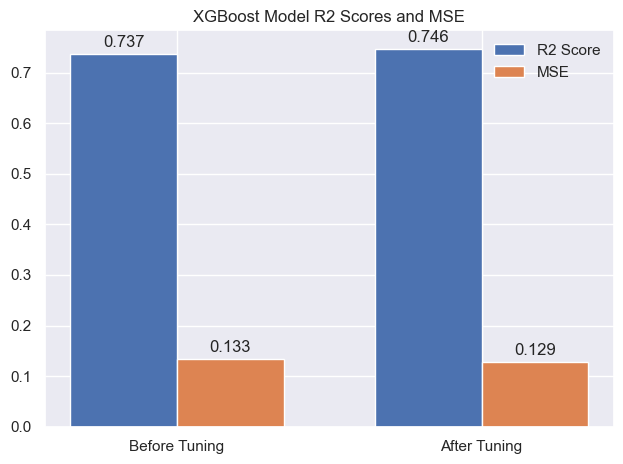

In [130]:
# Assuming you have defined r2_xgb, r2_tuned_xgb, mse_xgb, and mse_tuned_xgb somewhere before this code.

labels = ['Before Tuning', 'After Tuning']
x = range(len(labels))
width = 0.35

# Assuming you have the scores in a list in the same order as the labels.
r2_scores = [r2_xgb, r2_tuned_xgb]
mse_scores = [mse_xgb, mse_tuned_xgb]

# Create a subplot with two bar charts side by side for R2 and MSE
fig, ax = plt.subplots()

# Plot the R2 scores
rects1 = ax.bar(x, r2_scores, width, label='R2 Score')

# Plot the MSE scores next to the R2 scores
rects2 = ax.bar([i + width for i in x], mse_scores, width, label='MSE')

# Add the value labels on top of the bars
for rects in [rects1, rects2]:
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(f'{height:.3f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

# Set the x-axis labels and title
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels)
ax.set_title('XGBoost Model R2 Scores and MSE')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

* Catboost Tuning

In [131]:
tuned_CBR = CatBoostRegressor(depth = 7, iterations = 600, l2_leaf_reg = 3, learning_rate = 0.1, verbose=0)

tuned_CBR.fit(X_train, y_train)

cross_val_score(tuned_CBR, X_train, y_train,
                           scoring='r2',
                           cv=KFold(n_splits=5,
                                    shuffle=True,
                                    random_state=2022,
                                    ))

y_pred_cbr = tuned_CBR.predict(X_test)

mae_tuned_cbr  = metrics.mean_absolute_error(y_test, y_pred_cbr)
mse_tuned_cbr  = metrics.mean_squared_error(y_test, y_pred_cbr)
rmse_tuned_cbr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cbr))
r2_tuned_cbr   = metrics.r2_score(y_test, y_pred_cbr)


print('Mean Squarred Error of CatBoost Regressor     : ', mse_tuned_cbr)
print('R2 Score of CatBoost Regressor                : ', r2_tuned_cbr)

Mean Squarred Error of CatBoost Regressor     :  0.12840025836177194
R2 Score of CatBoost Regressor                :  0.7463295094509794


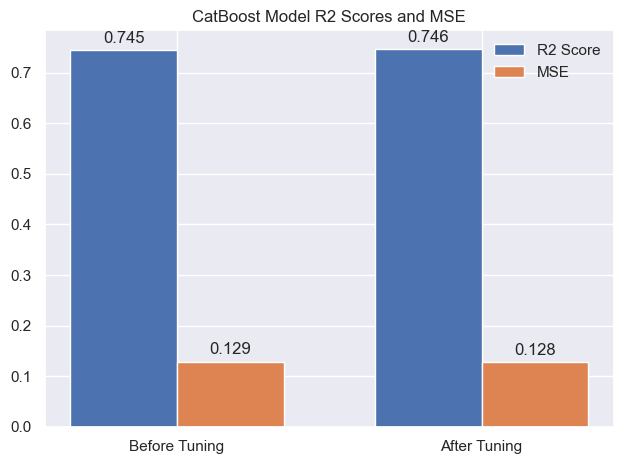

In [132]:
# Assuming you have defined r2_xgb, r2_tuned_xgb, mse_xgb, and mse_tuned_xgb somewhere before this code.

labels = ['Before Tuning', 'After Tuning']
x = range(len(labels))
width = 0.35

# Assuming you have the scores in a list in the same order as the labels.
r2_scores = [r2_cbr, r2_tuned_cbr]
mse_scores = [mse_cbr, mse_tuned_cbr]

# Create a subplot with two bar charts side by side for R2 and MSE
fig, ax = plt.subplots()

# Plot the R2 scores
rects1 = ax.bar(x, r2_scores, width, label='R2 Score')

# Plot the MSE scores next to the R2 scores
rects2 = ax.bar([i + width for i in x], mse_scores, width, label='MSE')

# Add the value labels on top of the bars
for rects in [rects1, rects2]:
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(f'{height:.3f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

# Set the x-axis labels and title
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels)
ax.set_title('CatBoost Model R2 Scores and MSE')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Feature Importance

* XGBoost feature Importance Graphic

In [ ]:
import xgboost
import shap
xx
'''# train XGBoost model
model = xgboost.XGBRegressor().fit(X, y)'''

# compute SHAP values
explainer = shap.Explainer(tuned_xgb, X)
shap_values = explainer(X)

In [134]:
# save the model to disk
import joblib
filename = 'finalized_model.sav'
joblib.dump(tuned_xgb, filename)

['finalized_model.sav']

In [135]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.7461196720736921
